# **1. Checking for Periodic Patterns**
**Methodology**


*   **Fourier Transform (FFT):** We'll apply the Fast Fourier Transform to the time series data to identify dominant frequencies, which correspond to periodic patterns.
*   **Visual Inspection:** Plotting the time series and the frequency spectrum to visually inspect for any periodicity.
Steps


<ipython-input-2-018d6cc76114>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  depth_df.fillna(method='ffill', inplace=True)
<ipython-input-2-018d6cc76114>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  inflow_df.fillna(method='ffill', inplace=True)


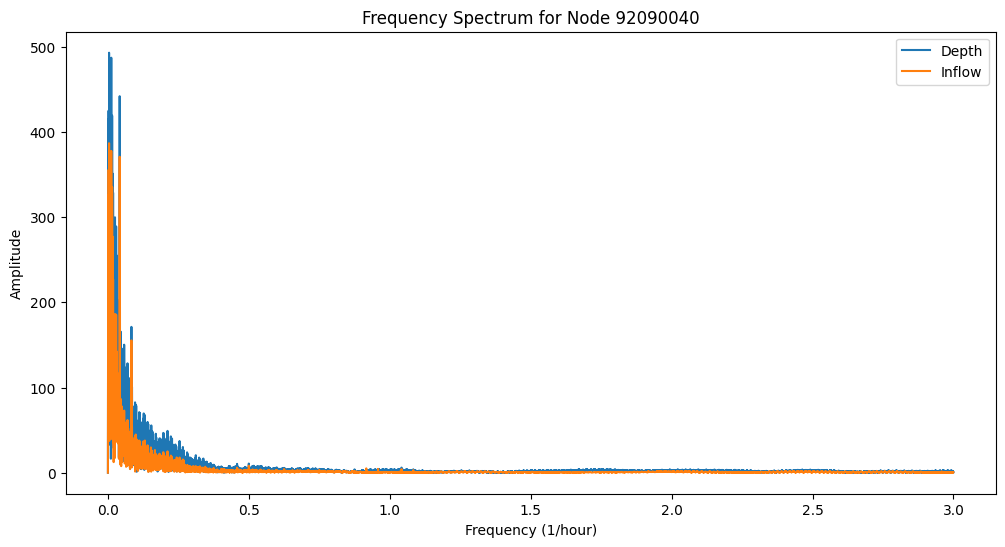

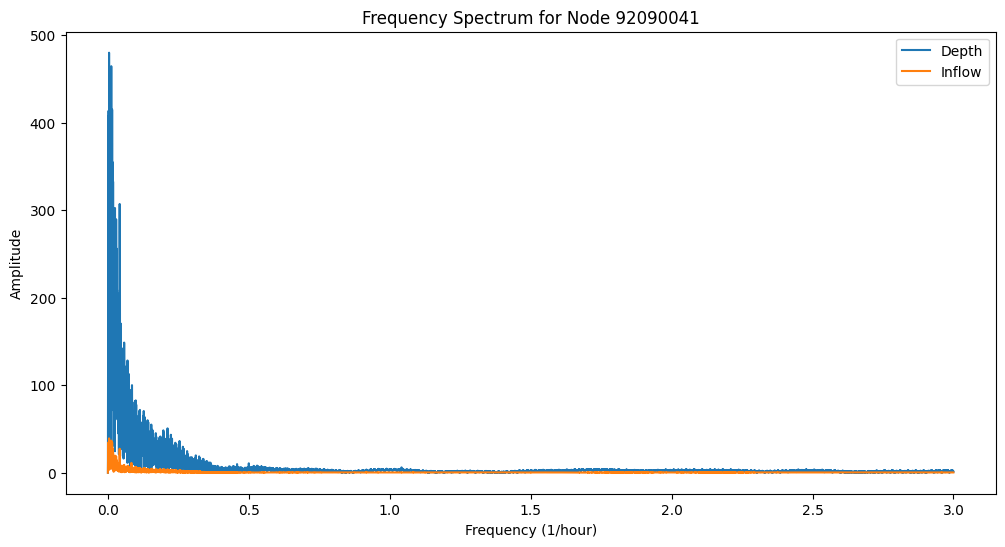

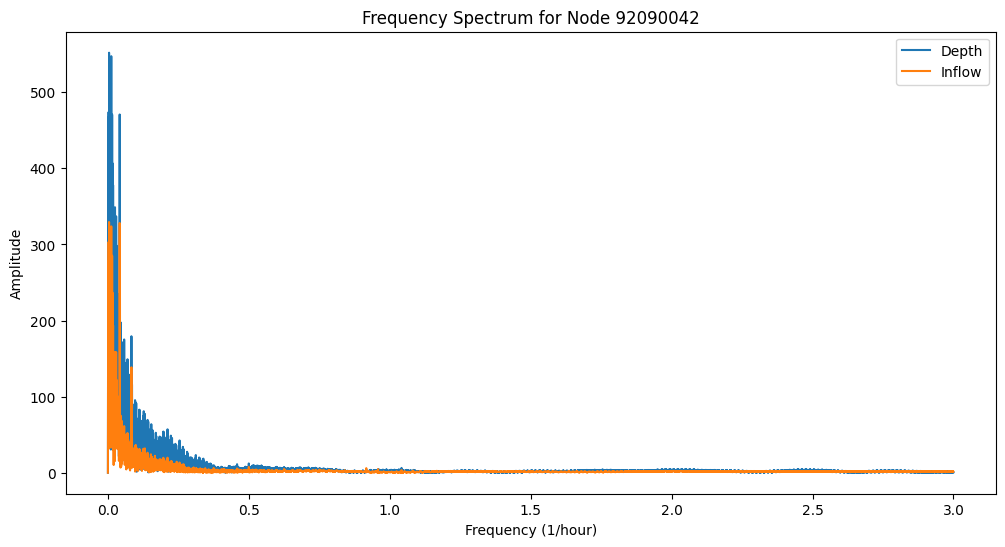

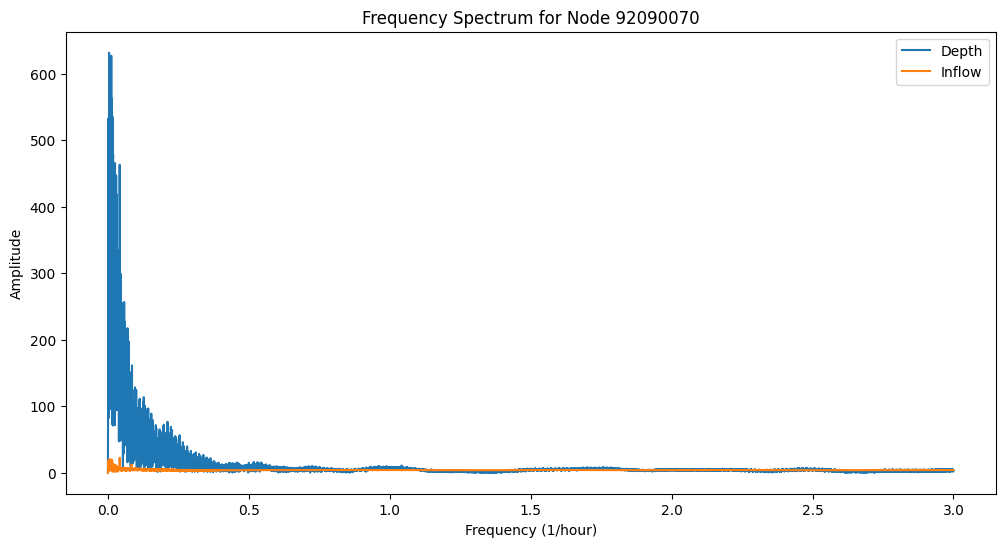

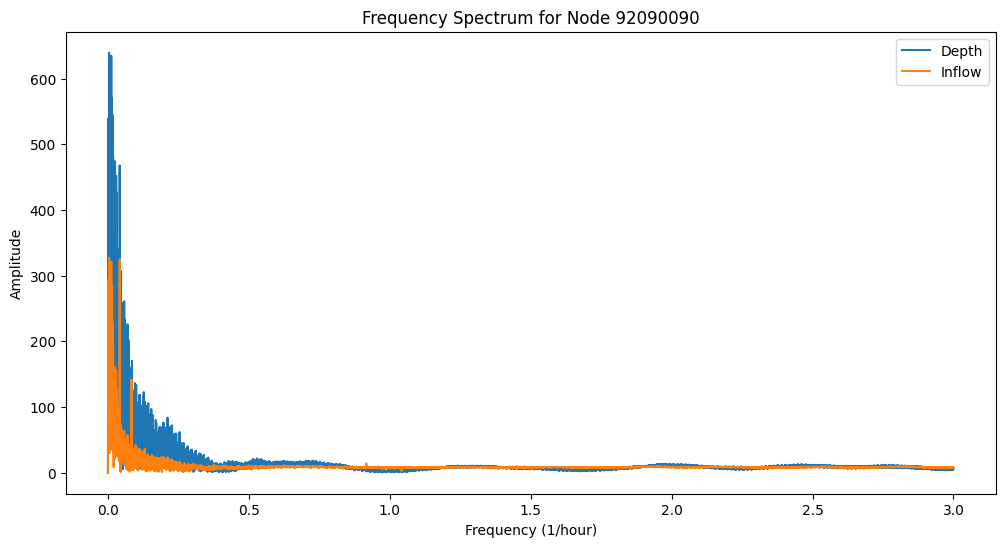

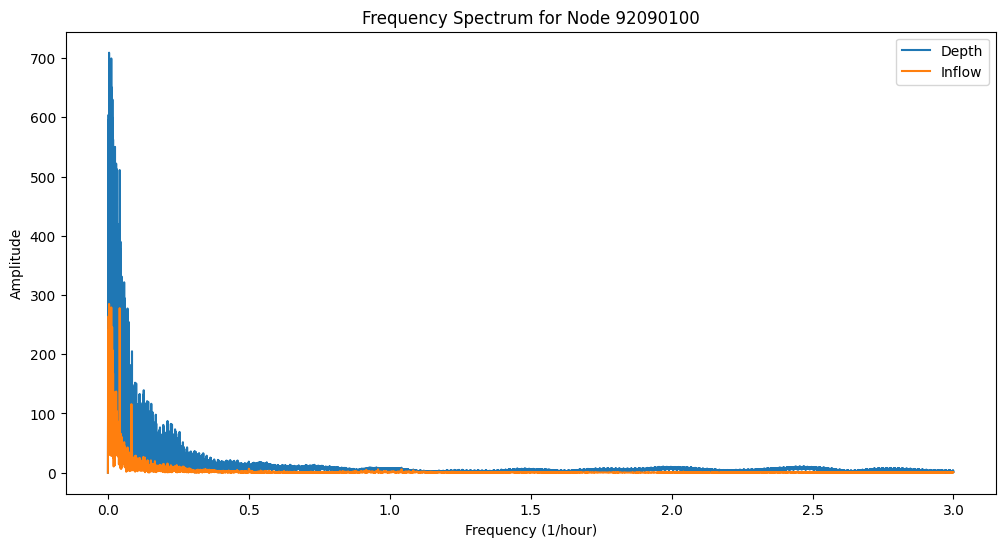

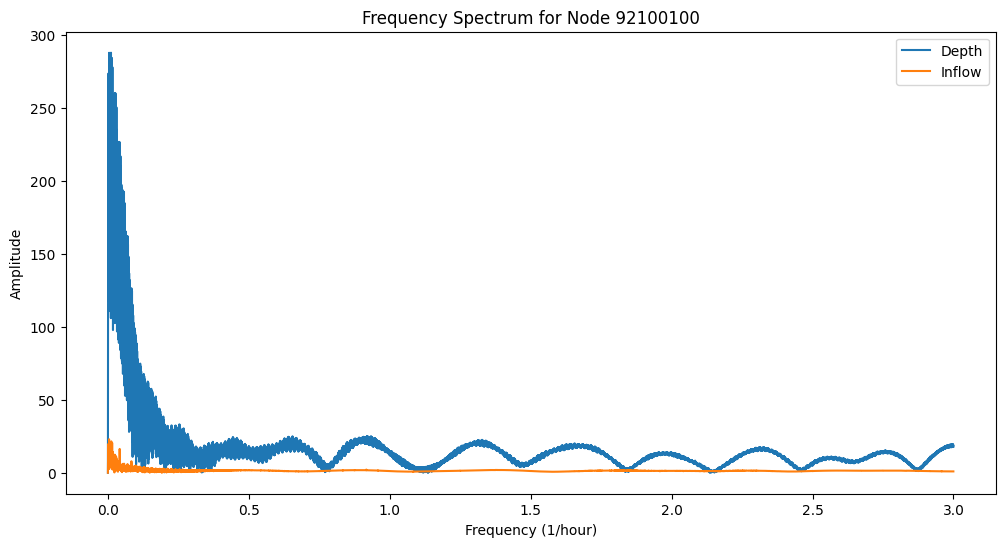

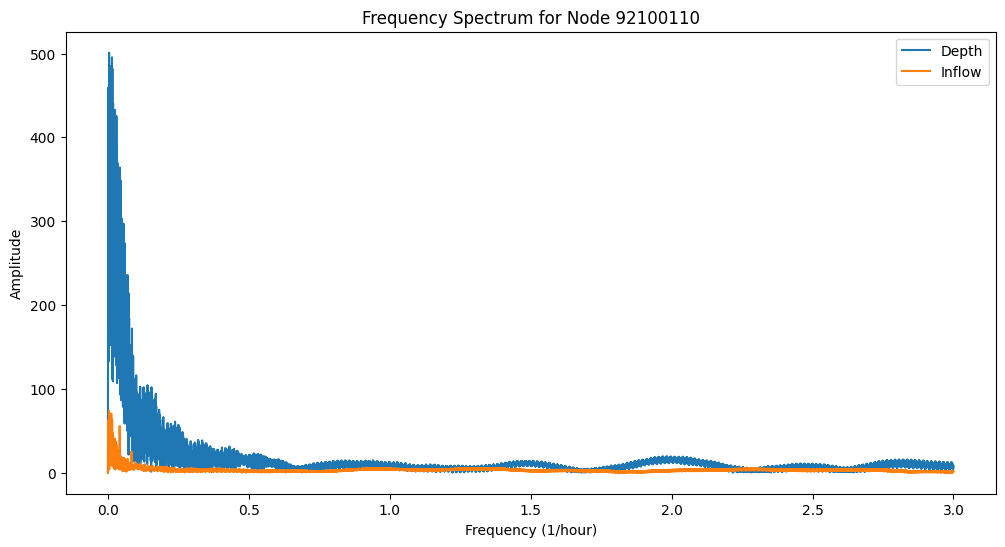

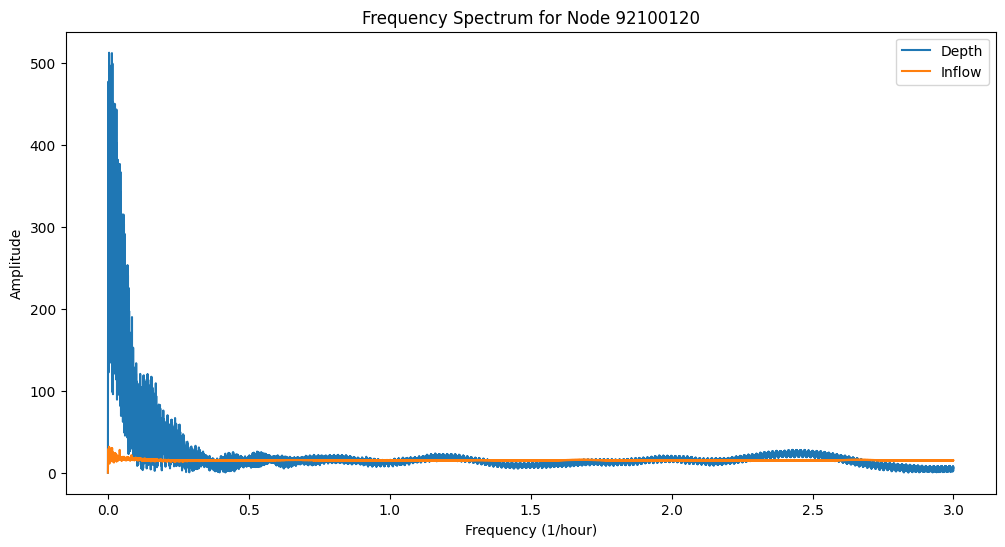

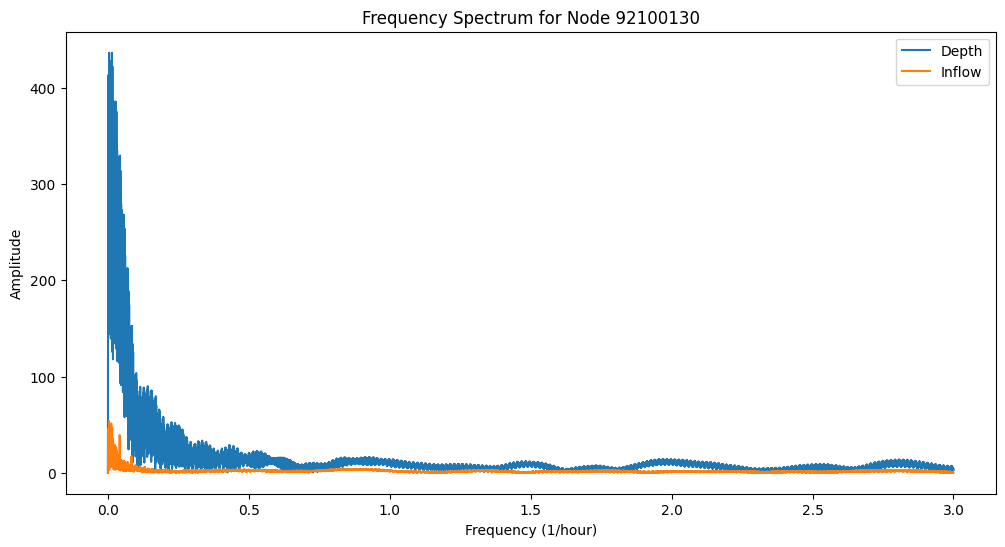

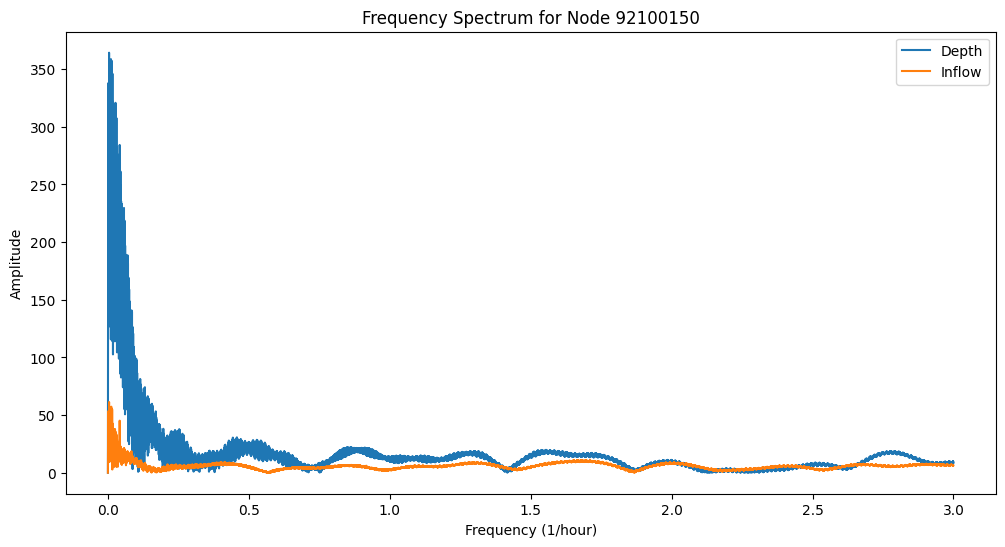

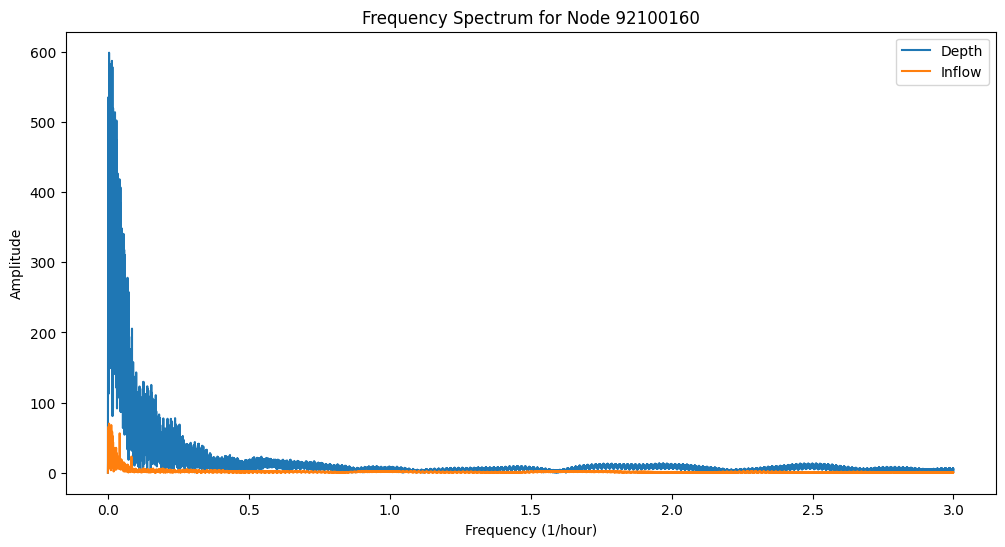

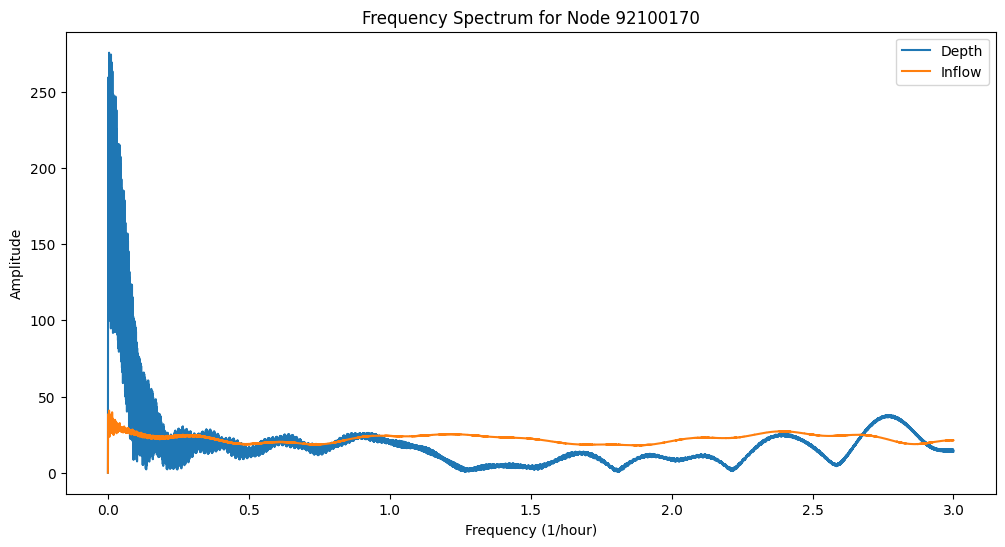

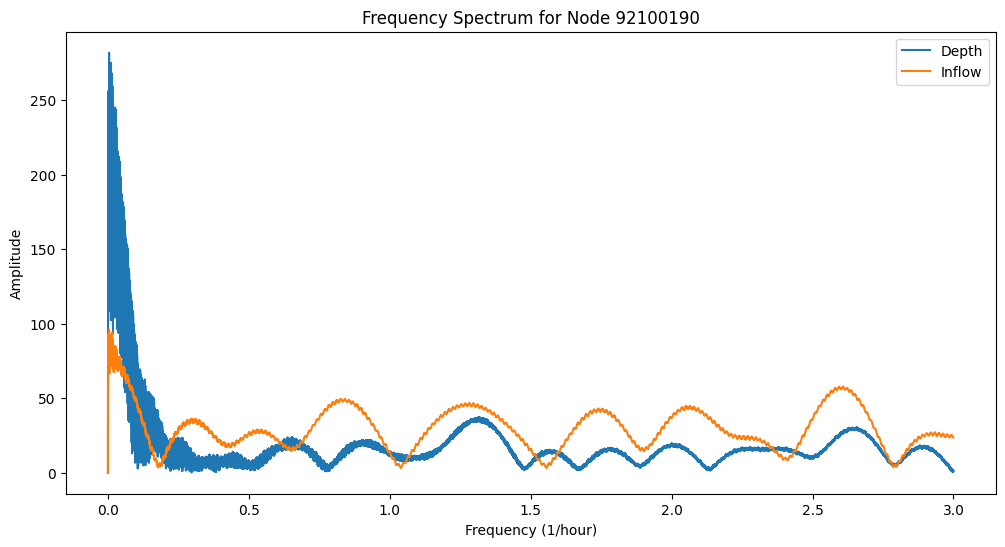

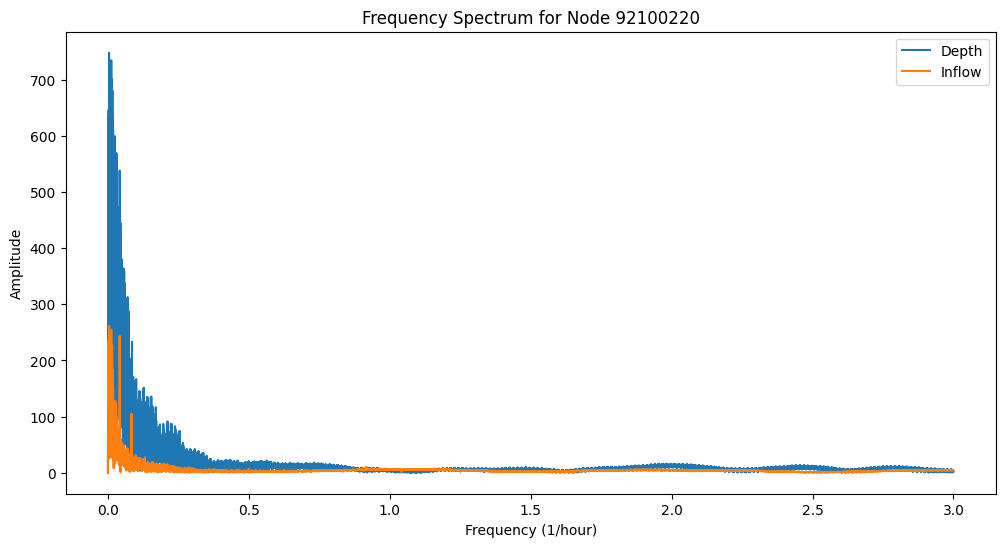

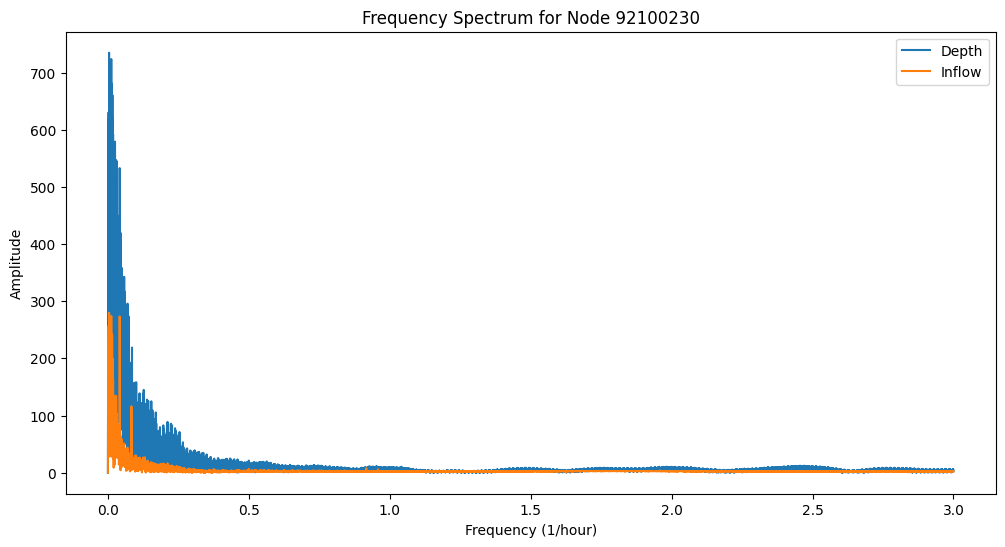

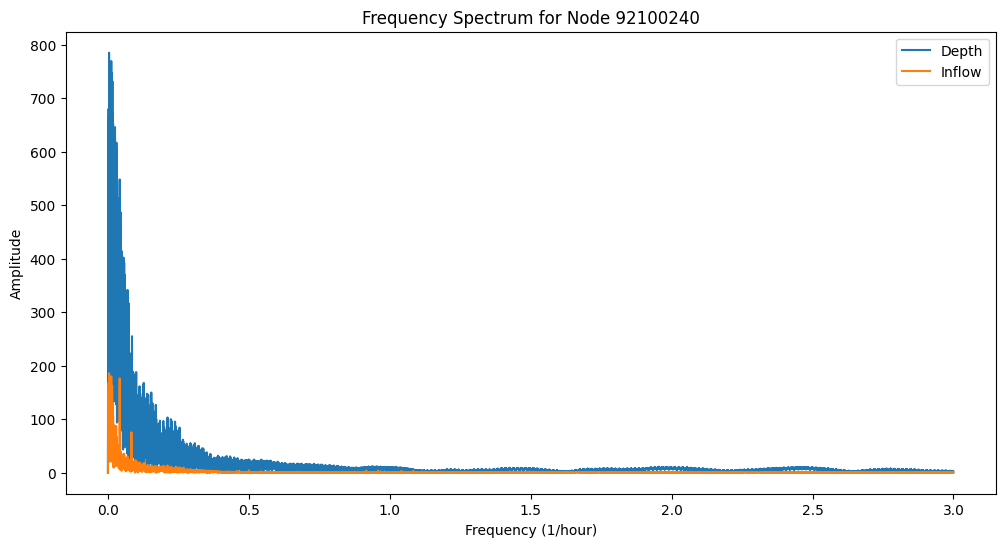

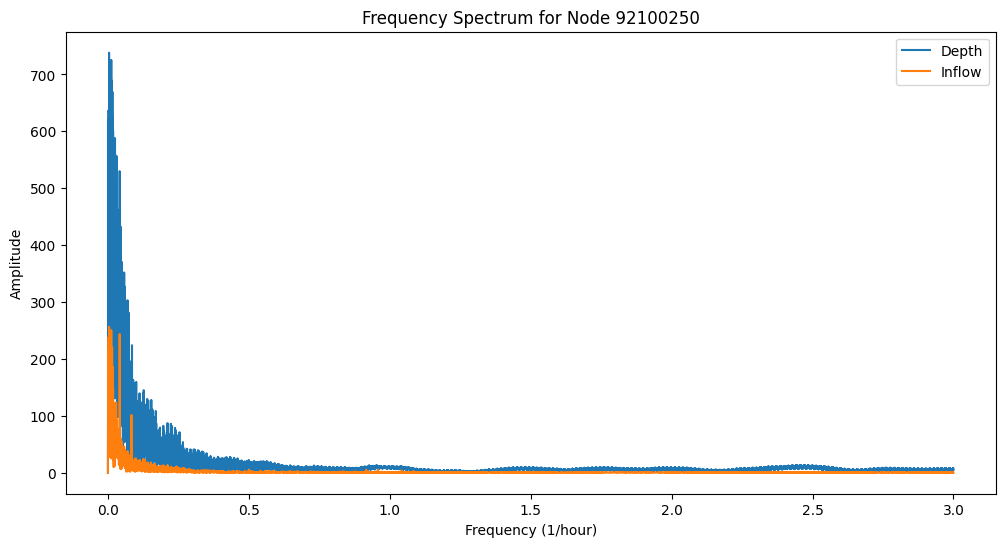

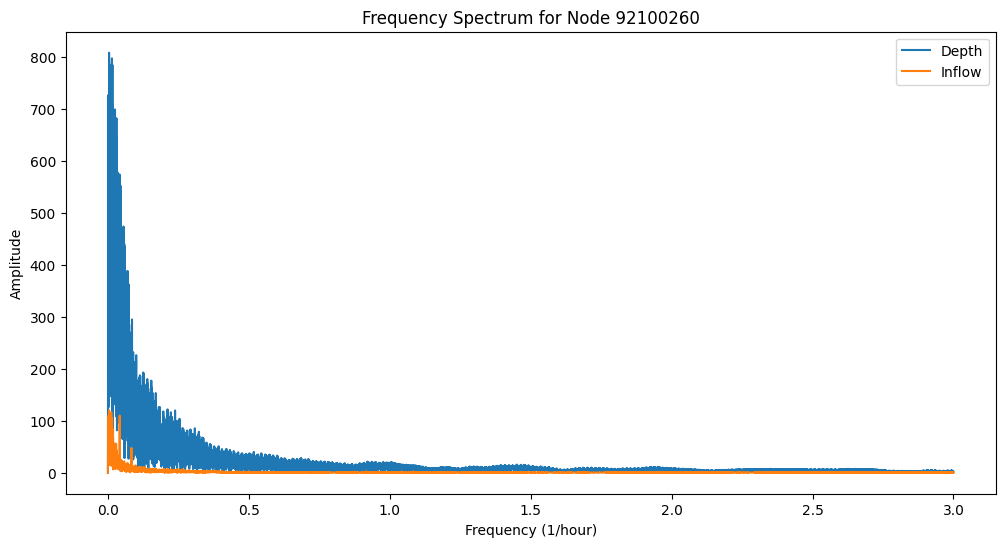

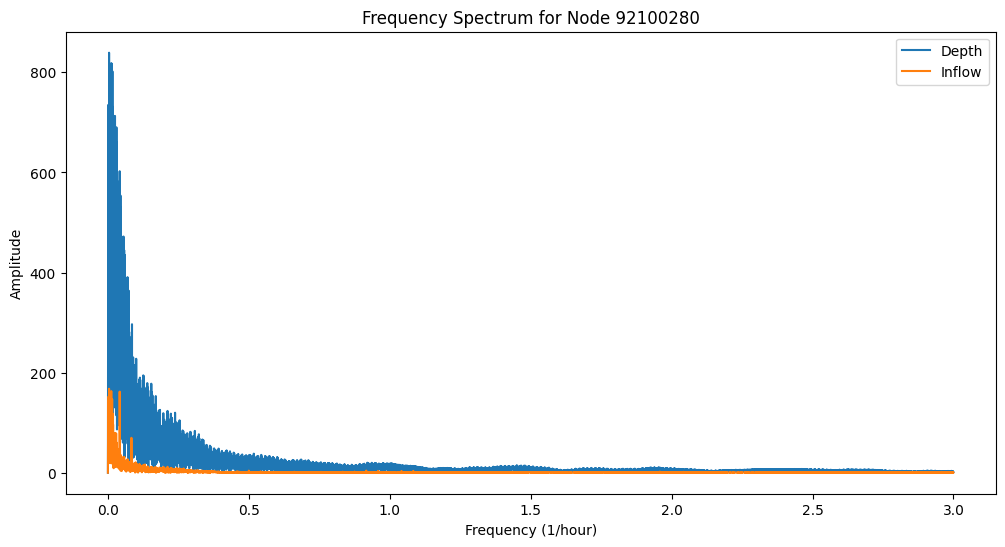

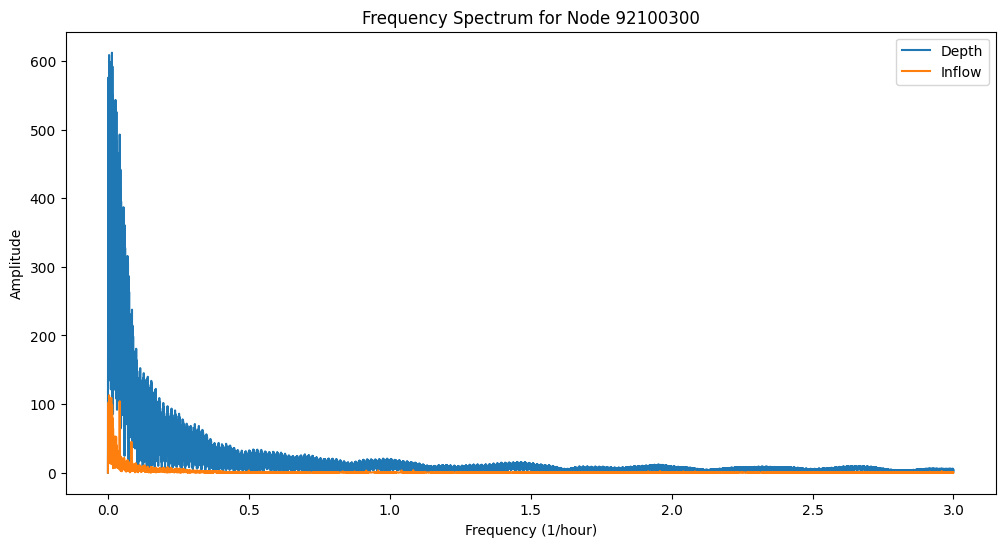

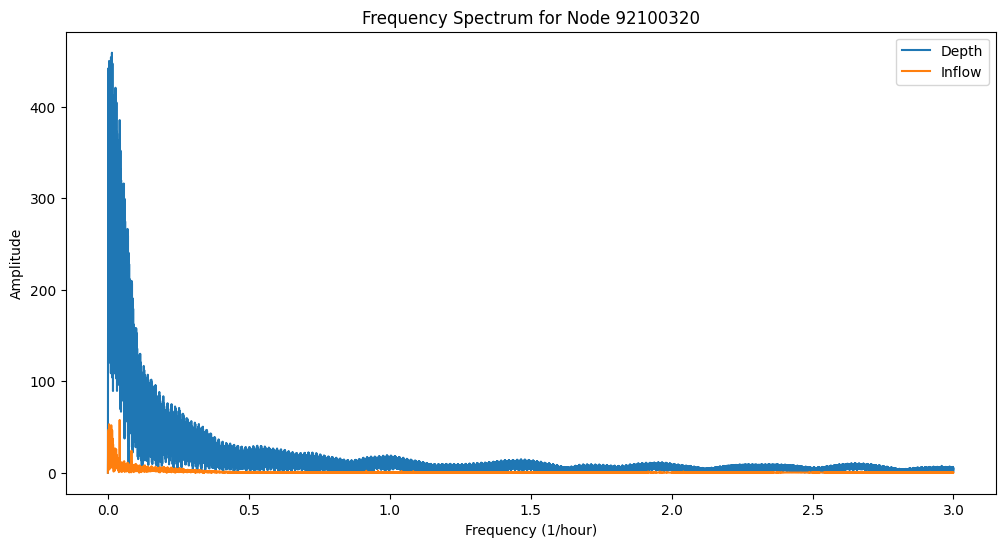

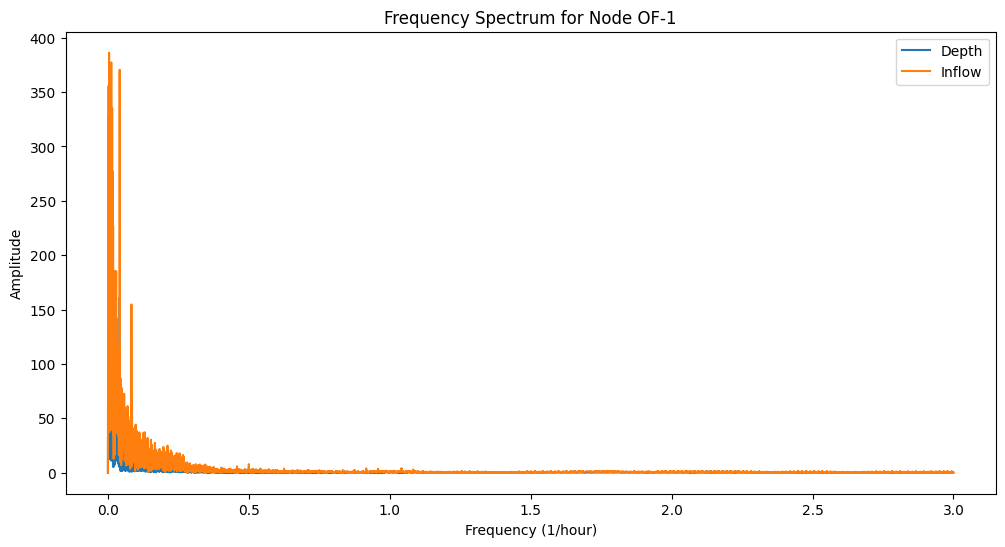

Node: 92090040
  Depth Periods (hours): [ 67.06818182 421.57142857  23.99186992  84.31428571 245.91666667]
  Inflow Periods (hours): [ 67.06818182 421.57142857  23.99186992  84.31428571 245.91666667]

Node: 92090041
  Depth Periods (hours): [983.66666667 421.57142857  67.06818182  84.31428571 245.91666667]
  Inflow Periods (hours): [983.66666667  67.06818182 421.57142857  84.31428571 245.91666667]

Node: 92090042
  Depth Periods (hours): [ 67.06818182  23.99186992 421.57142857  84.31428571 245.91666667]
  Inflow Periods (hours): [ 67.06818182 421.57142857  84.31428571  23.99186992 245.91666667]

Node: 92090070
  Depth Periods (hours): [ 92.21875     62.78723404  70.26190476  84.31428571 245.91666667]
  Inflow Periods (hours): [983.66666667  67.06818182  84.31428571 245.91666667  23.99186992]

Node: 92090090
  Depth Periods (hours): [ 92.21875     62.78723404  70.26190476  84.31428571 245.91666667]
  Inflow Periods (hours): [ 67.06818182 421.57142857  84.31428571  23.99186992 245.916666

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

depth_df = pd.read_csv('/content/depth.csv')
inflow_df = pd.read_csv('/content/inflow.csv')

depth_df['Time-Stamps'] = pd.to_datetime(depth_df['Time-Stamps'], format='%m/%d/%y %H:%M')
inflow_df['Time-Stamps'] = pd.to_datetime(inflow_df['Time-Stamps'], format='%m/%d/%y %H:%M')

# Set Time-Stamps as Index
depth_df.set_index('Time-Stamps', inplace=True)
inflow_df.set_index('Time-Stamps', inplace=True)

depth_df.fillna(method='ffill', inplace=True)
inflow_df.fillna(method='ffill', inplace=True)

# Set Sampling Interval
T = 10 / 60  # 10 minutes converted to hours

# Analyze all nodes
nodes = depth_df.columns

results = {}

for node in nodes:
    depth_series = depth_df[node]
    depth_series = depth_series.to_numpy()
    inflow_series = inflow_df[node]
    inflow_series = inflow_series.to_numpy()

    # Number of samples
    N = len(depth_series)

    # Compute FFT for Depth
    depth_fft = fft(depth_series - np.mean(depth_series))
    depth_freqs = fftfreq(N, T)[:N // 2]

    # Compute FFT for Inflow
    inflow_fft = fft(inflow_series - np.mean(inflow_series))
    inflow_freqs = fftfreq(N, T)[:N // 2]

    # Find significant periods for Depth
    depth_amplitudes = np.abs(depth_fft[:N // 2])
    depth_significant_freqs = depth_freqs[np.argsort(depth_amplitudes)[-5:]]
    depth_periods = 1 / depth_significant_freqs

    # Find significant periods for Inflow
    inflow_amplitudes = np.abs(inflow_fft[:N // 2])
    inflow_significant_freqs = inflow_freqs[np.argsort(inflow_amplitudes)[-5:]]
    inflow_periods = 1 / inflow_significant_freqs

    # Store results
    results[node] = {
        'Depth Periods (hours)': depth_periods,
        'Inflow Periods (hours)': inflow_periods
    }

    # Plot Frequency Spectra
    plt.figure(figsize=(12, 6))
    plt.plot(depth_freqs, depth_amplitudes, label='Depth')
    plt.plot(inflow_freqs, inflow_amplitudes, label='Inflow')
    plt.title(f'Frequency Spectrum for Node {node}')
    plt.xlabel('Frequency (1/hour)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Display Results
for node, res in results.items():
    print(f"Node: {node}")
    print("  Depth Periods (hours):", res['Depth Periods (hours)'])
    print("  Inflow Periods (hours):", res['Inflow Periods (hours)'])
    print()


**Key Observations**


*   The periodicity analysis of water depth and inflow data across 23 nodes in the real water dataset reveals significant patterns that provide valuable insights into the behavior of the system. Across most nodes, the depth and inflow data exhibit recurring cycles at approximately 67.07 hours, 84.31 hours, 245.92 hours, and 421.57 hours. These periodicities suggest the influence of systemic or environmental factors, such as operational schedules, natural phenomena, or regulatory controls. However, variations exist at some nodes, reflecting localized conditions or anomalies.

*   A closer look reveals that the periodicity of water depth and inflow aligns at many nodes, indicating that inflow rates directly impact water depth fluctuations. For example, at Node 92090040, both depth and inflow share similar periodicities. However, this correlation is not consistent across all nodes. For instance:

   *   At Node 92090041, depth periodicities include [983.67, 421.57, 67.07, 84.31, 245.92], while inflow periodicities are [983.67, 67.07, 421.57, 84.31, 245.92], showing some reordering.
   *   At Node 92100320, depth periodicities include [590.2, 62.79, 245.92, 92.22, 70.26], while inflow periodicities are [67.07, 421.57, 84.31, 245.92, 23.99], demonstrating significant deviation.

*   Some unique observations stand out in the data. For instance:

     *   Node 92090041 exhibits a significantly long inflow periodicity of approximately 983.67 hours (about 41 days), which might indicate rare events or localized anomalies.
     *   Node 92100320 shows a unique depth periodicity of 590.2 hours (about 25 days), suggesting the influence of distinct localized factors such as sedimentation, leakage, or irregular flow dynamics.

*   Interestingly, Node OF-1 displays consistent periodicities in both depth and inflow data, with values [67.07, 421.57, 84.31, 245.92, 23.99]. Contrary to the initial interpretation, there are no extremely short periodicities (e.g., 0.33 or 1.0 hours). This indicates that variations at this node are not as dynamic as previously assumed and may align with broader system patterns.

*   The dominant periodicities across the network, such as 67-84 hours (roughly 2-3 days), 245.92 hours (about 10 days), and 421.57 hours (approximately 17.5 days), may align with regular operational cycles or environmental rhythms, such as weather patterns or maintenance schedules. Longer cycles, like 983.67 hours, could reflect broader-scale influences, such as seasonal changes or regional water management activities.

*   These findings offer actionable insights for optimizing water system operations. The identified periodicities can help inform predictive models for inflow and depth variations, enabling proactive management of pumps, inflows, and flood control mechanisms. However, predictive models must account for both dominant network-wide patterns and localized anomalies to be effective. The correlation between depth and inflow periodicities at many nodes highlights opportunities to synchronize these systems for enhanced efficiency, but the variability in alignment suggests that site-specific factors also play a role.

*   The anomalies observed at specific nodes, such as unique long periods or significant deviations, emphasize the importance of localized investigations. Targeted studies at these nodes can uncover the factors driving these deviations and inform strategies to address them. For example:

   *   At Node 92100320, investigating sedimentation or irregular flow dynamics might explain the unique periodicity of 590.2 hours.
   *   At Node 92090041, exploring rare events or operational irregularities could shed light on the exceptionally long cycle of 983.67 hours.

*   In summary, the periodicity analysis reveals both consistent network-wide patterns and localized anomalies. Leveraging these insights can enhance operational efficiency, predictability, and overall water management. Further exploration of unique patterns and anomalies will ensure a comprehensive understanding of the system’s dynamics.



# **2. Calculating Autocorrelation**
**Methodology**

*   **Autocorrelation Function (ACF):** Measures the correlation of a time series with a lagged version of itself over successive time intervals.

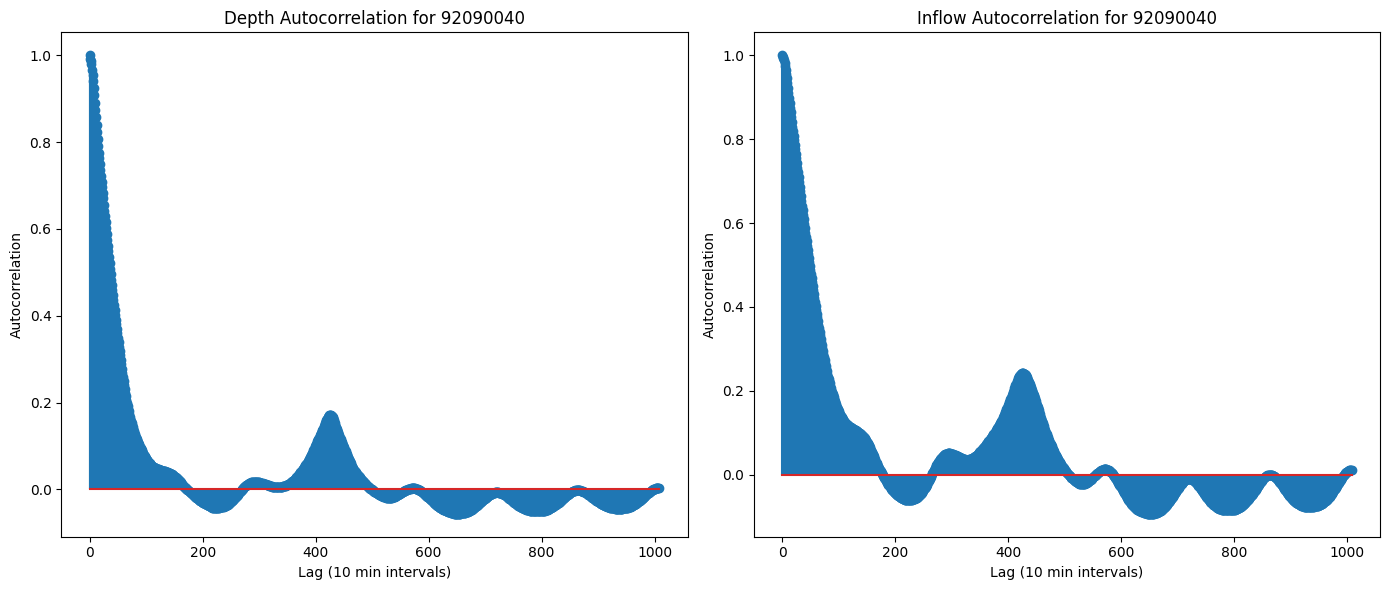

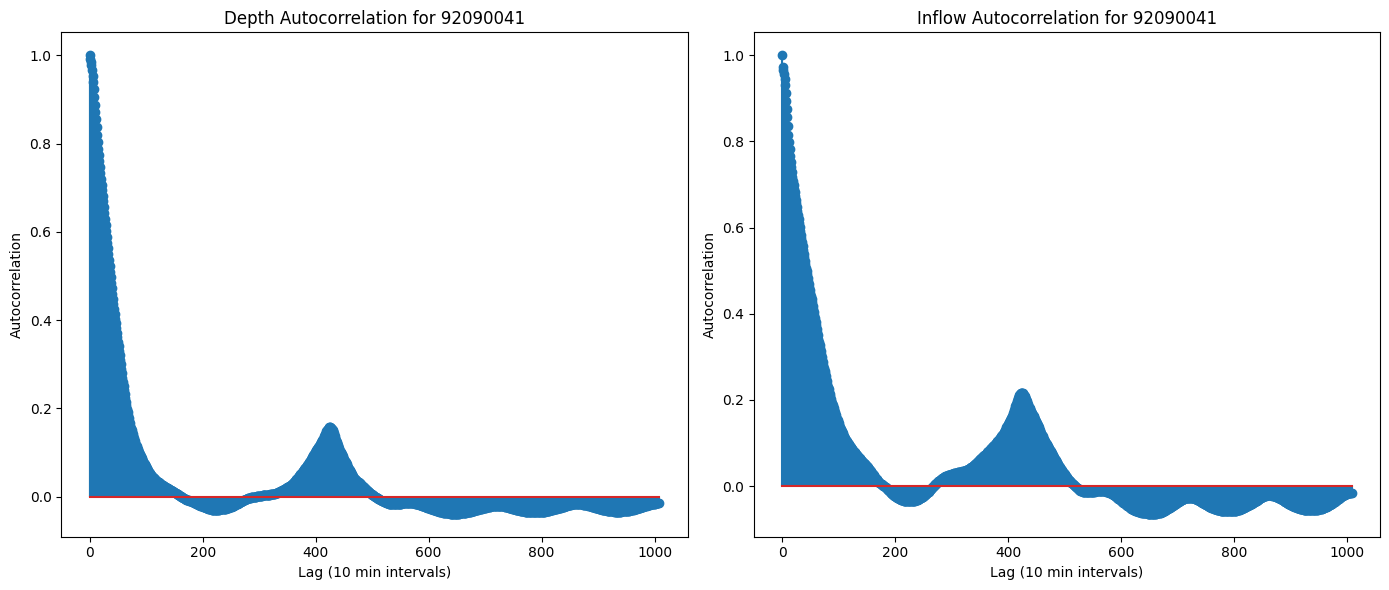

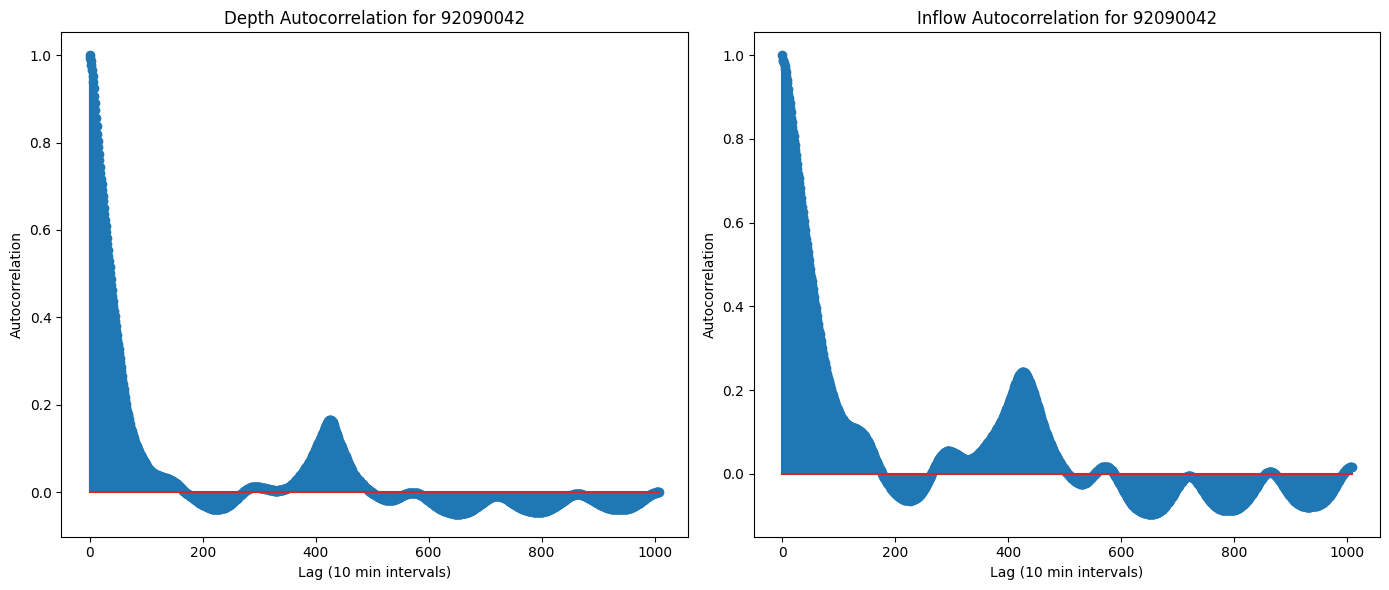

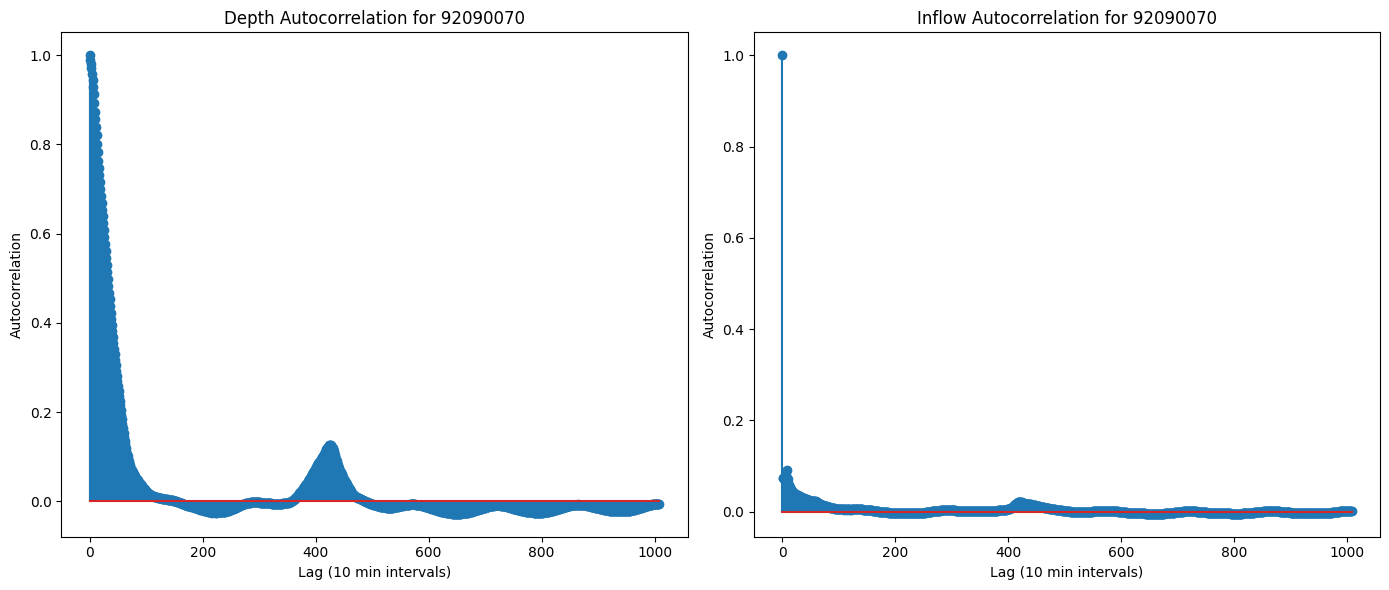

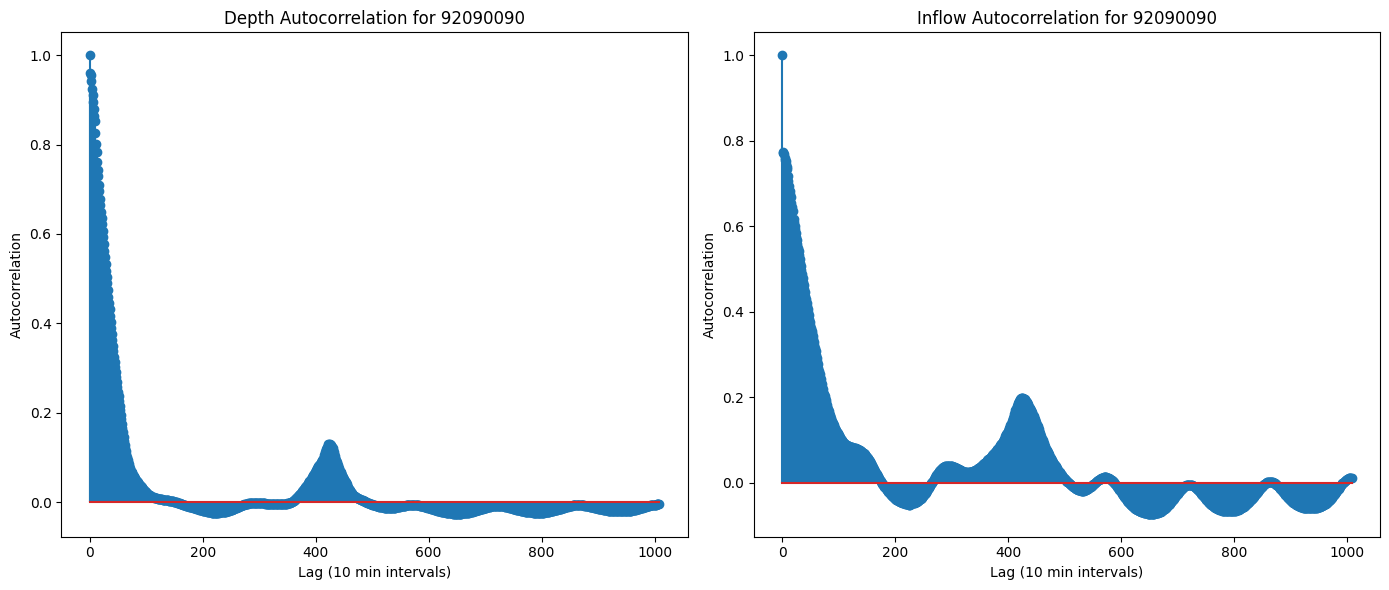

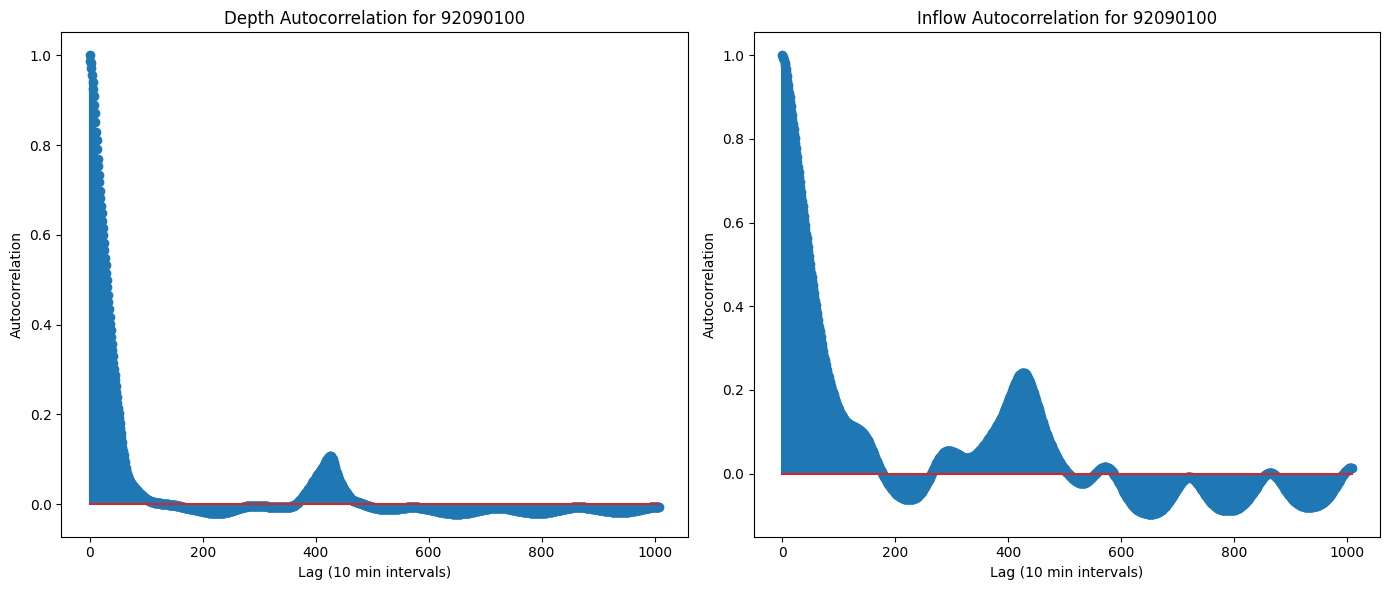

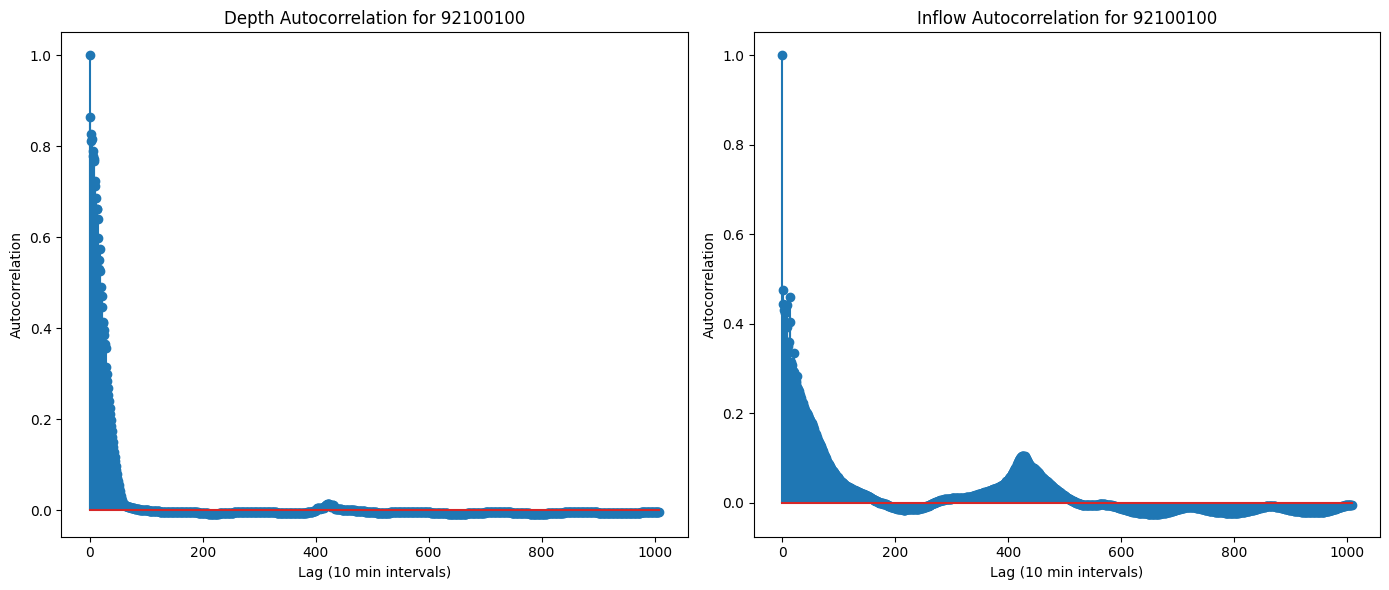

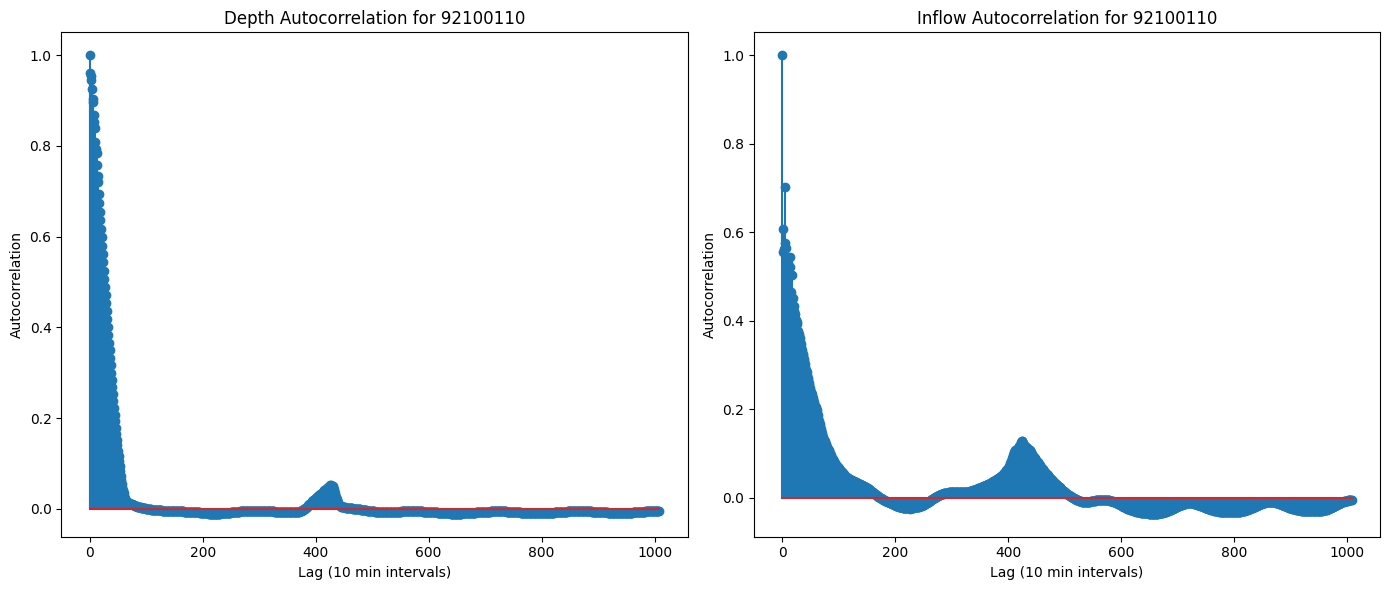

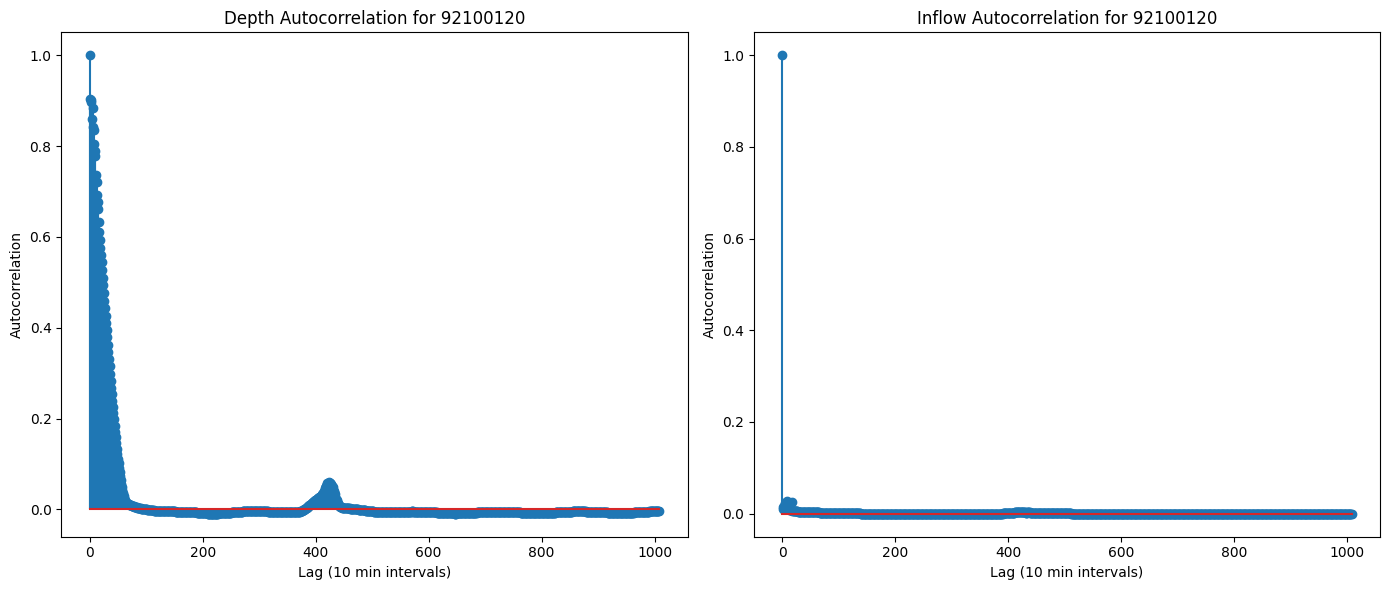

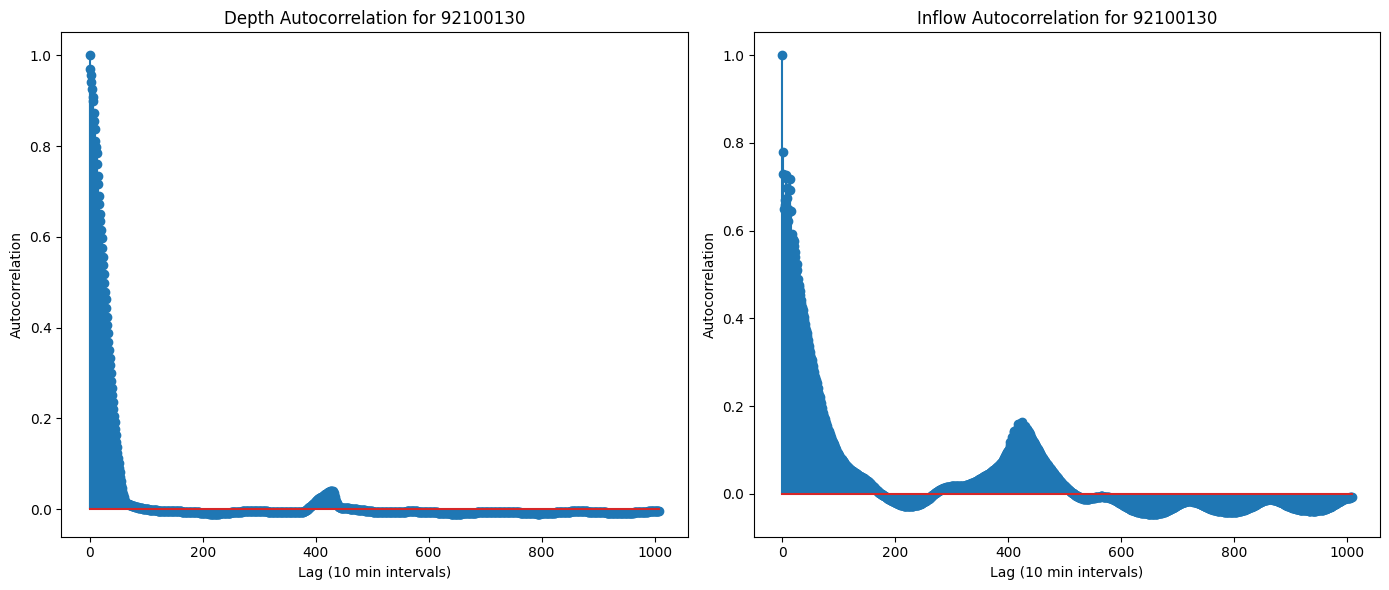

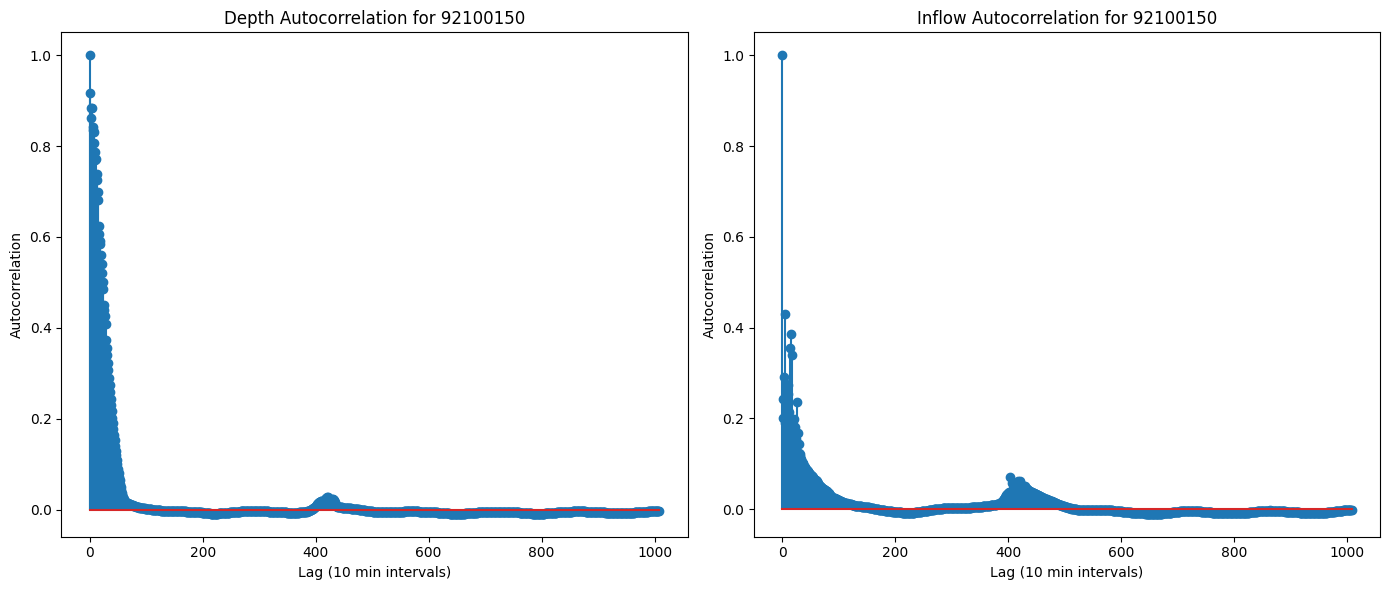

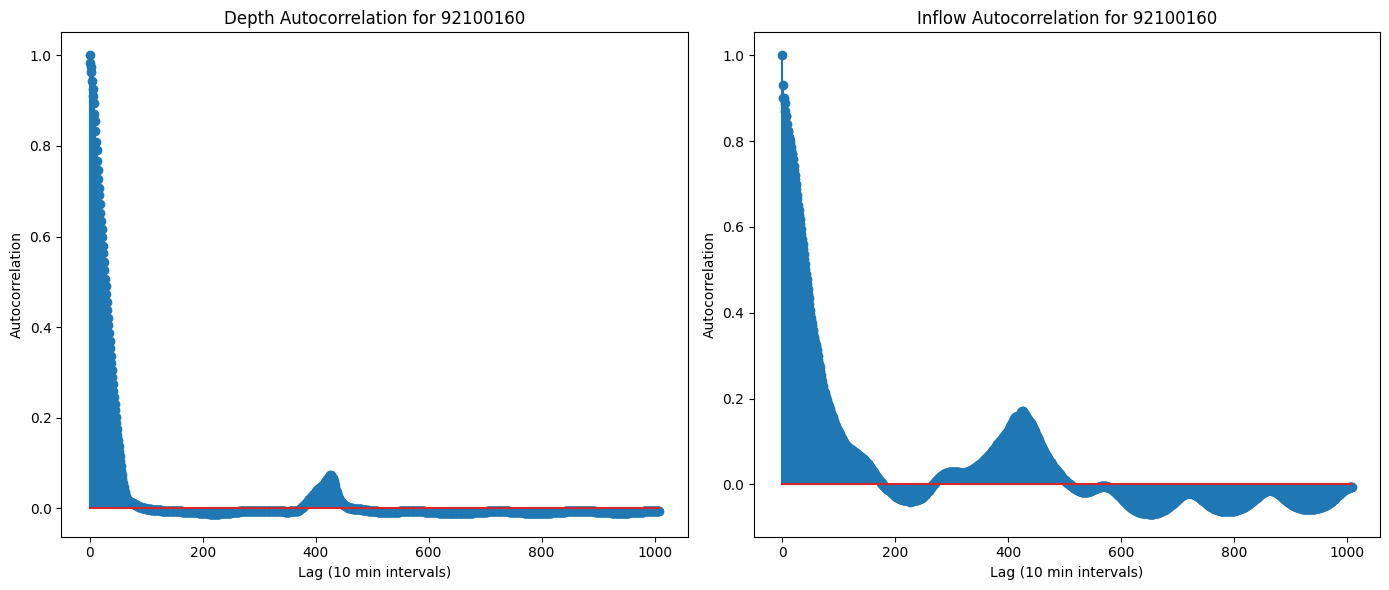

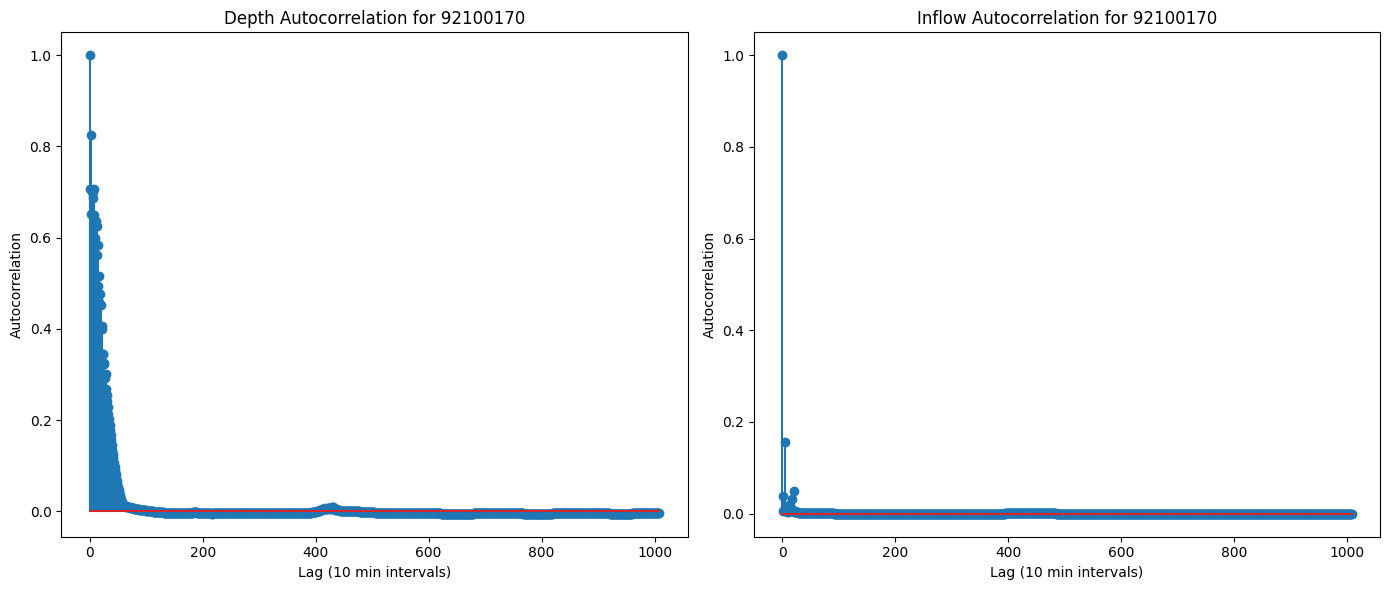

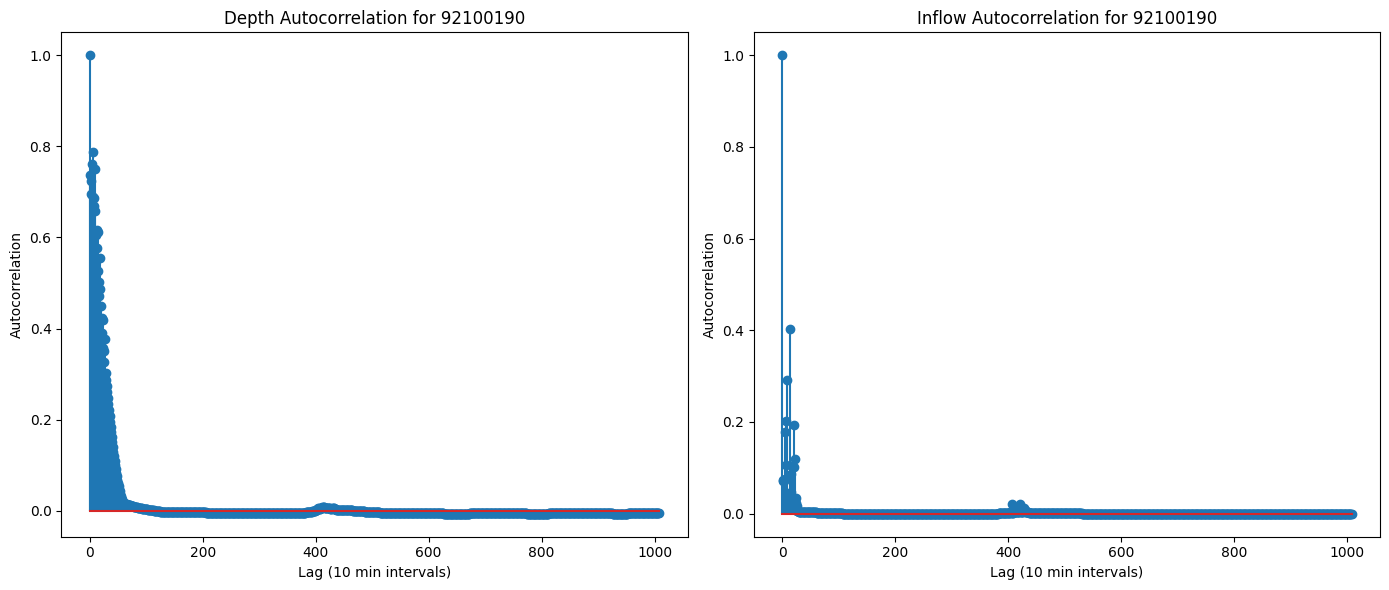

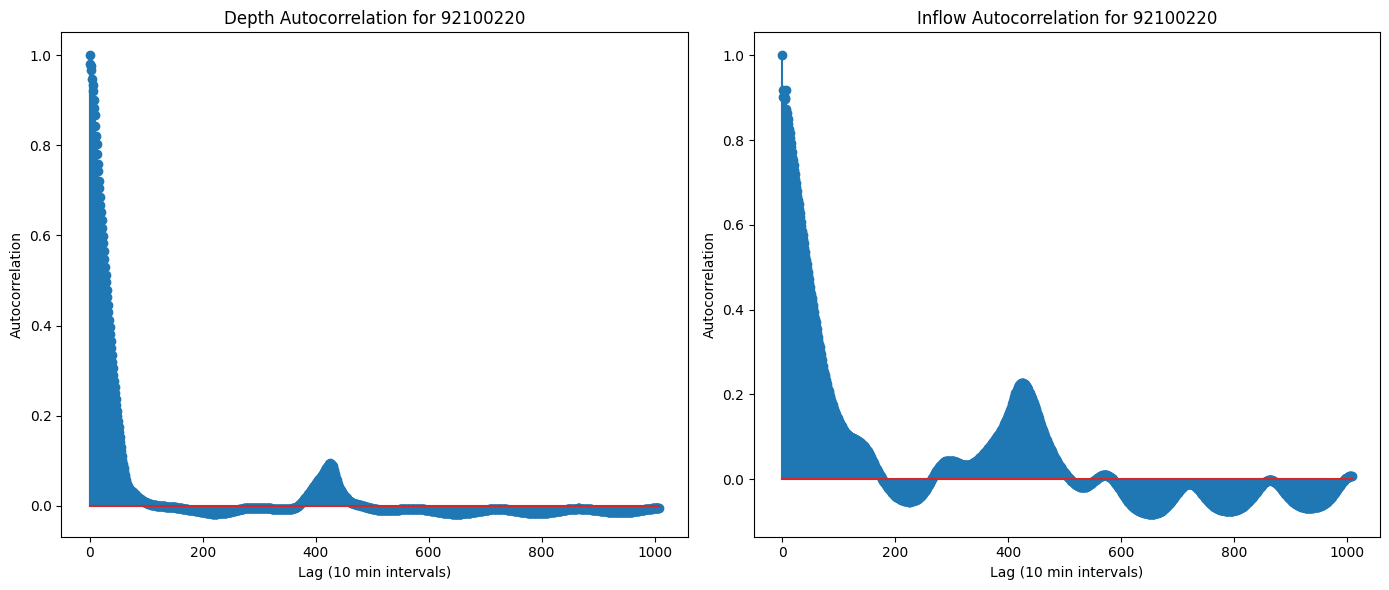

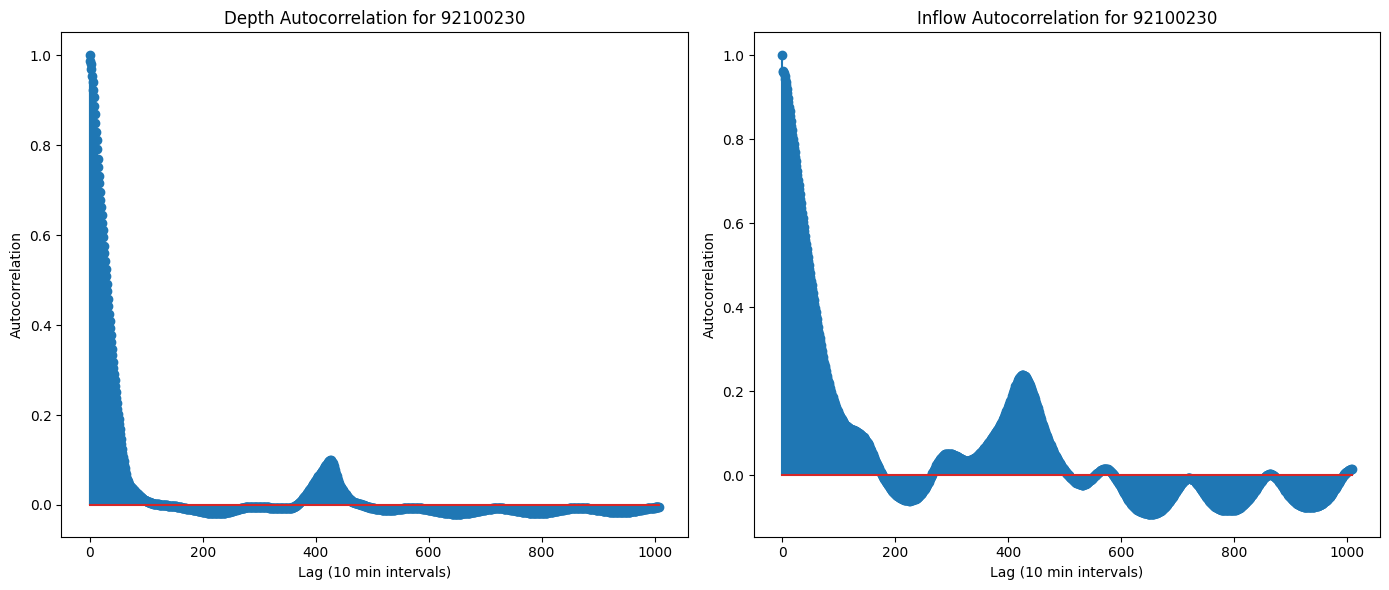

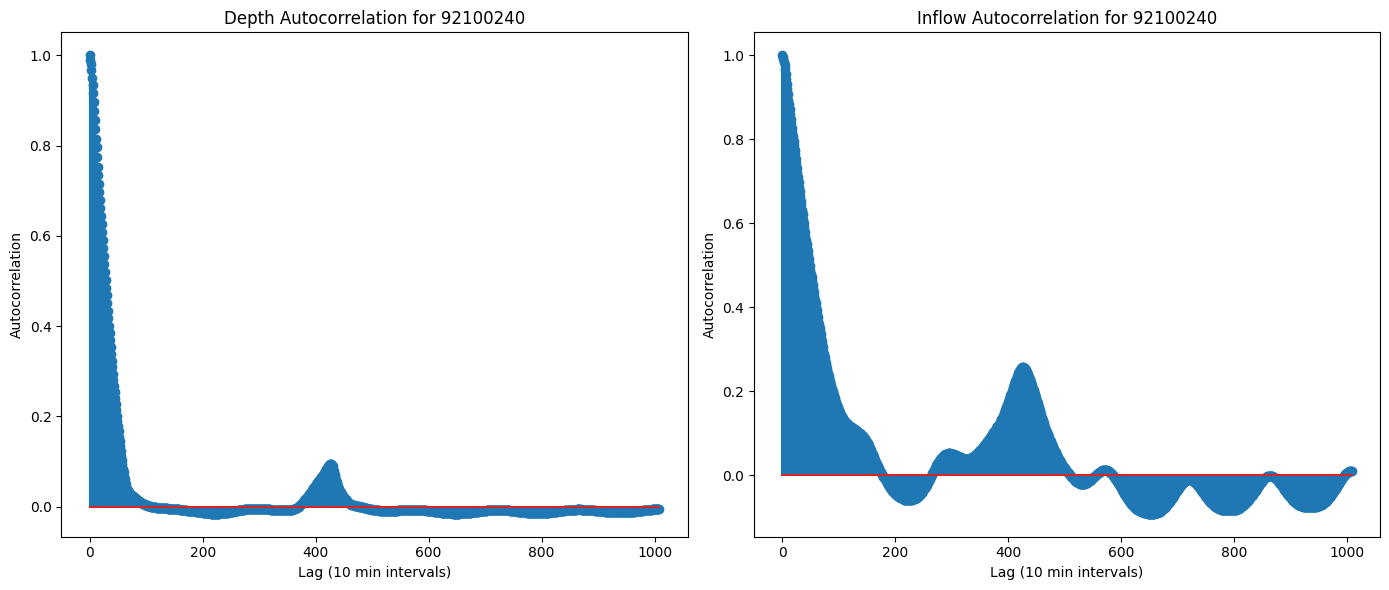

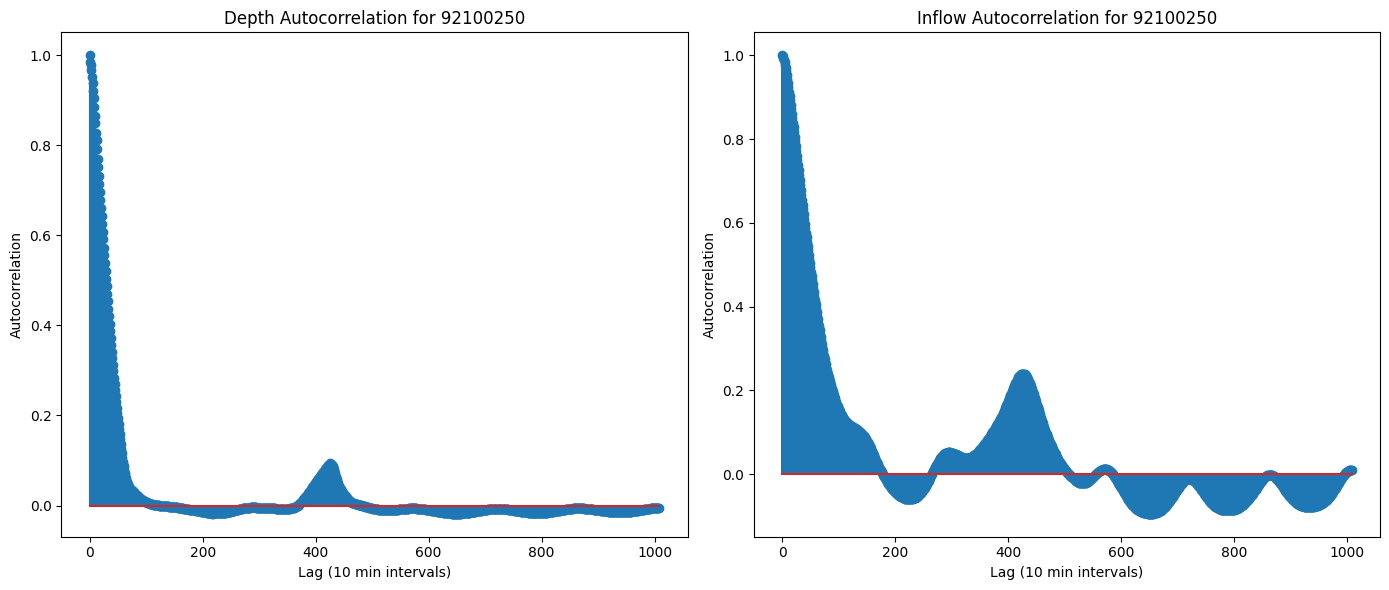

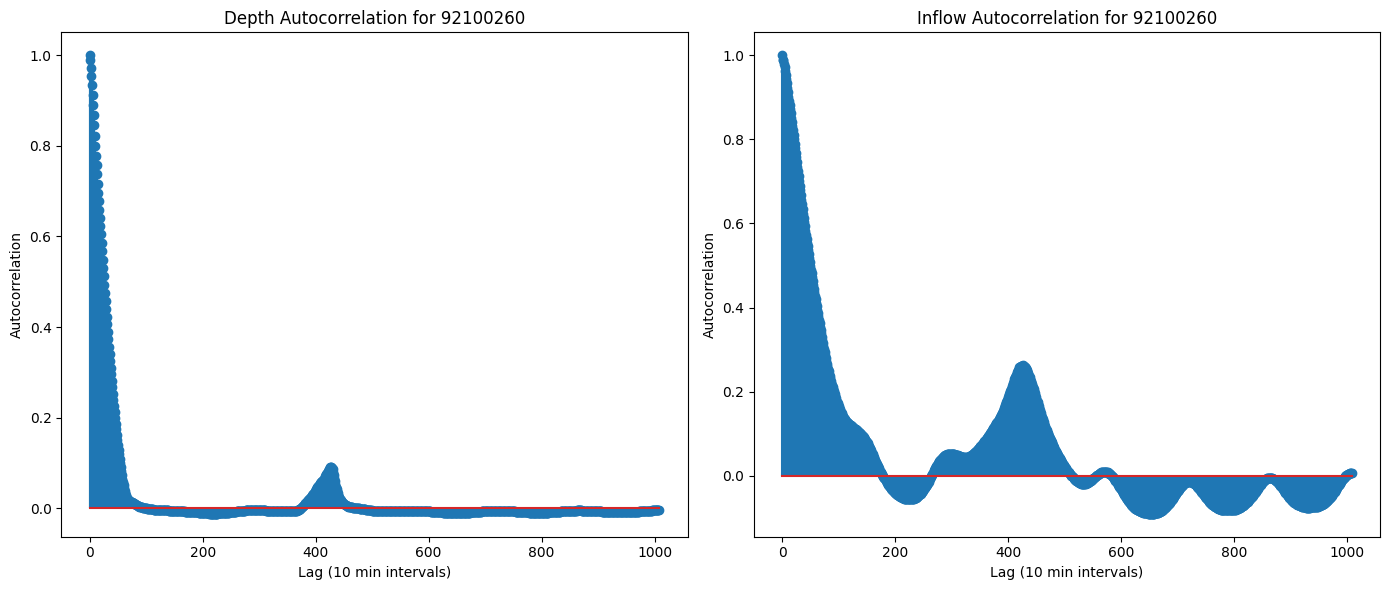

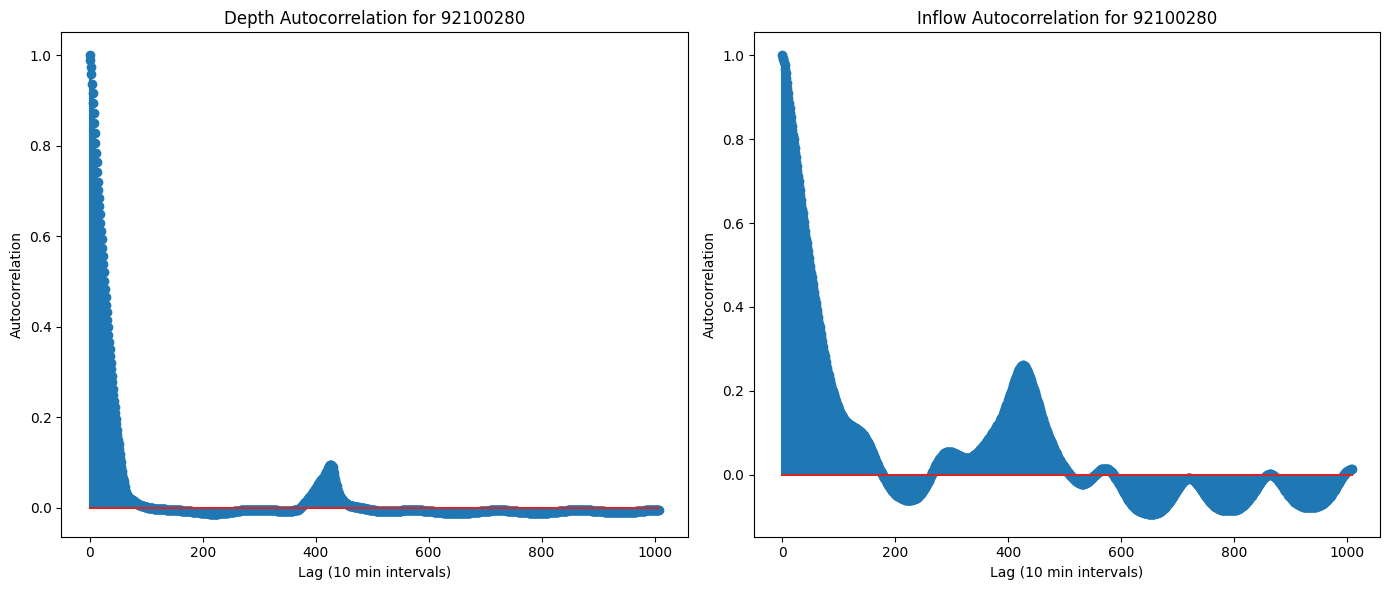

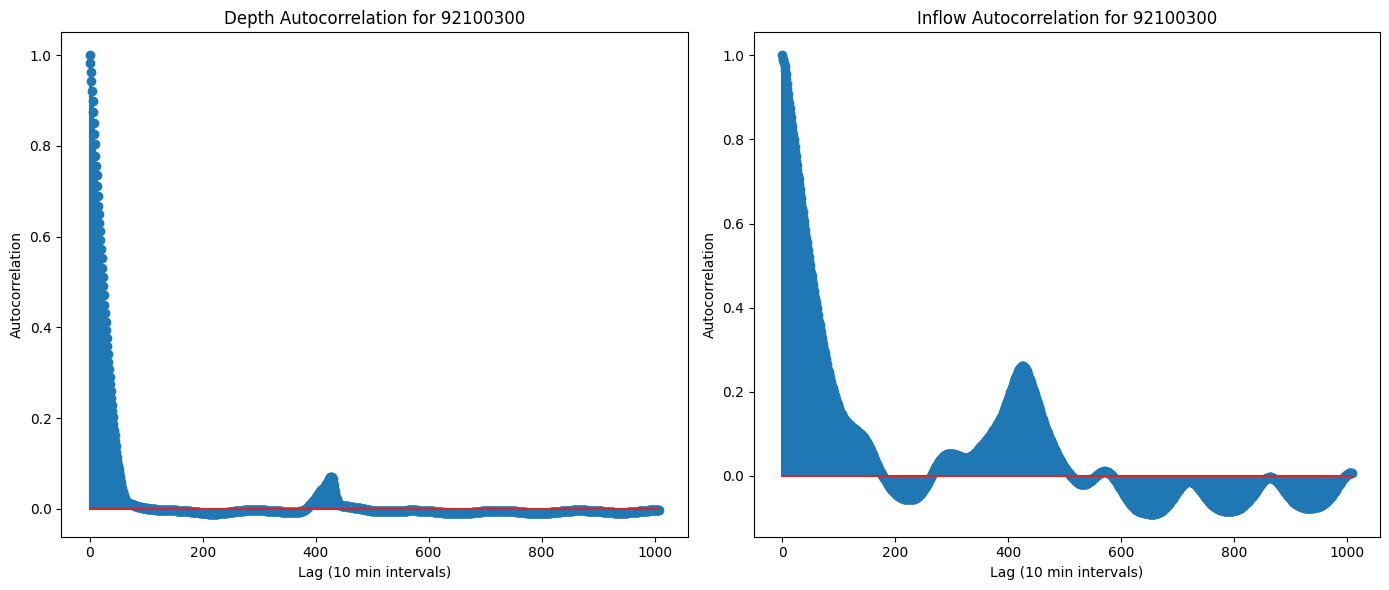

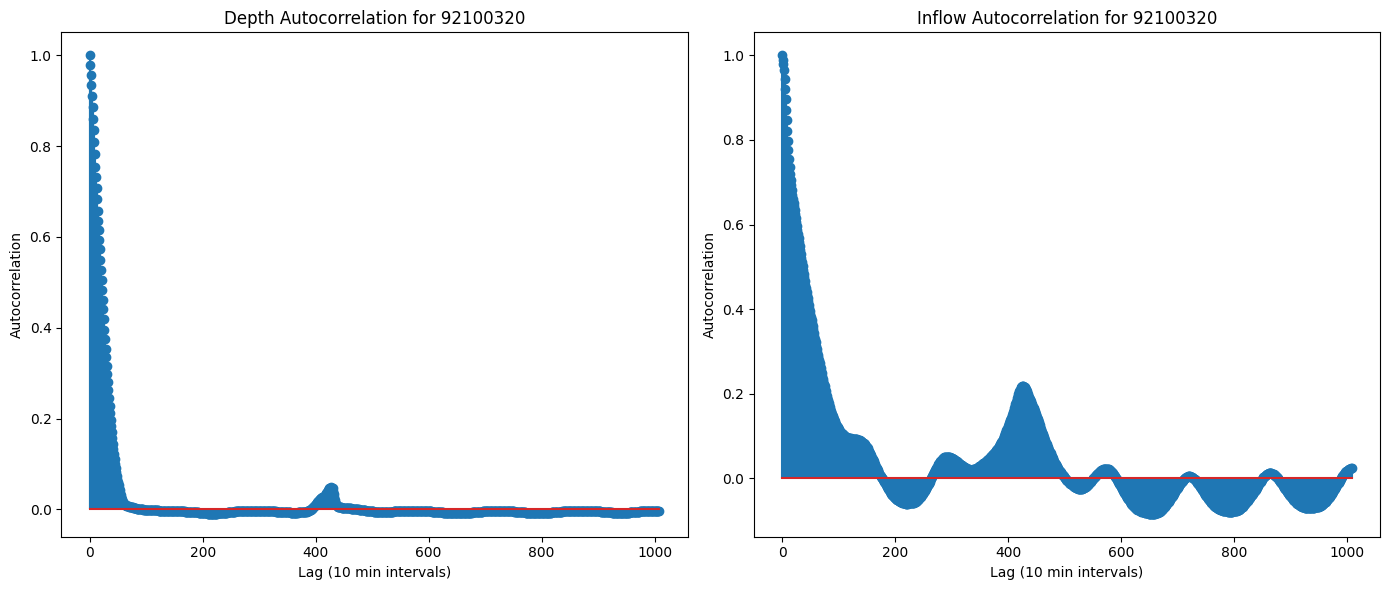

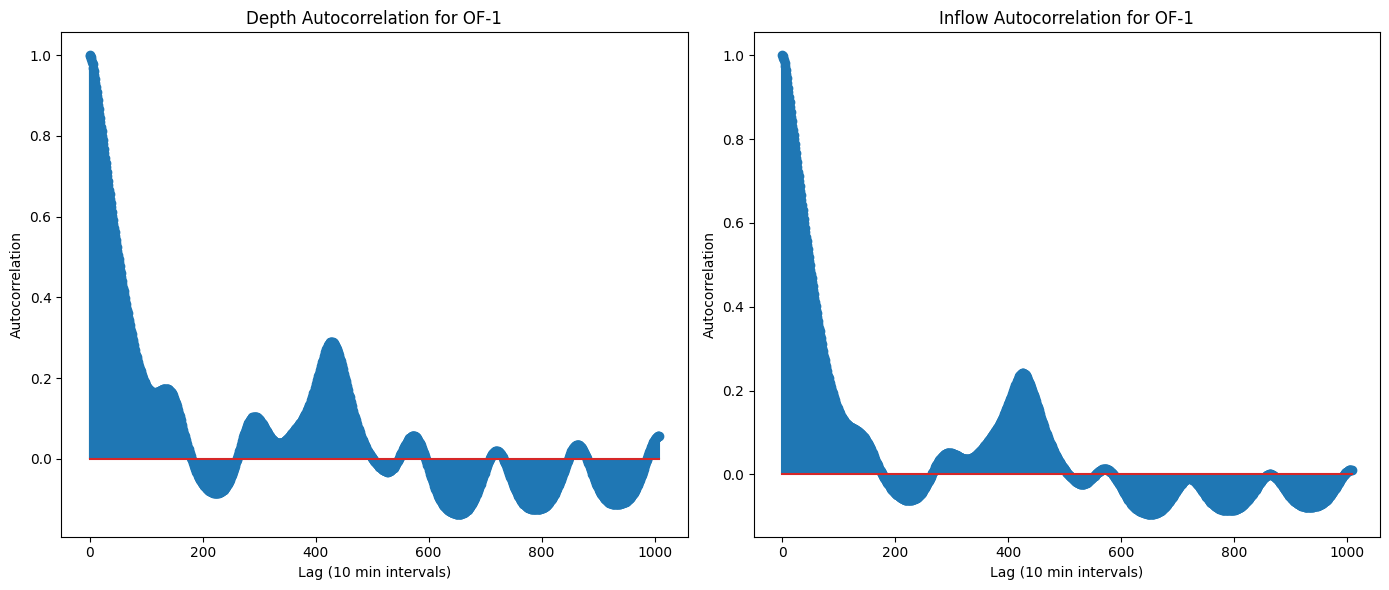

Node: 92090040
  Depth ACF First Few Lags: [1.         0.99247709 0.98616713 0.97895743 0.96649643]
  Inflow ACF First Few Lags: [1.         0.99701411 0.99381333 0.98860562 0.98158708]

Node: 92090041
  Depth ACF First Few Lags: [1.         0.9921174  0.98565108 0.97858269 0.96596591]
  Inflow ACF First Few Lags: [1.         0.97289348 0.96674577 0.9567506  0.94481607]

Node: 92090042
  Depth ACF First Few Lags: [1.         0.99278063 0.9867036  0.97874702 0.96579672]
  Inflow ACF First Few Lags: [1.         0.98881322 0.98669486 0.98129944 0.97412546]

Node: 92090070
  Depth ACF First Few Lags: [1.         0.98861346 0.98054671 0.97220498 0.95883554]
  Inflow ACF First Few Lags: [1.         0.07290827 0.07272223 0.07062241 0.07112651]

Node: 92090090
  Depth ACF First Few Lags: [1.         0.96017075 0.95623972 0.94310183 0.92384862]
  Inflow ACF First Few Lags: [1.         0.77062338 0.77316864 0.76941741 0.75968474]

Node: 92090100
  Depth ACF First Few Lags: [1.         0.98806455

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Parameters
sampling_interval = 10  # in minutes
max_lag = 6 * 24 * 7  # Weekly pattern in lags (7 days, 6 lags per hour, 24 hours/day)

nodes = depth_df.columns  # Node names
autocorr_results = {}  # Store results

for node in nodes:
    depth_series = depth_df[node]
    inflow_series = inflow_df[node]

    # Compute Autocorrelation
    depth_acf = acf(depth_series, nlags=max_lag, fft=True)  # Using FFT for speed
    inflow_acf = acf(inflow_series, nlags=max_lag, fft=True)

    # Store Autocorrelation Results
    autocorr_results[node] = {
        'Depth ACF': depth_acf,
        'Inflow ACF': inflow_acf
    }

    # Plot Autocorrelation for Depth and Inflow
    plt.figure(figsize=(14, 6))

    # Depth Autocorrelation
    plt.subplot(1, 2, 1)
    plt.stem(range(len(depth_acf)), depth_acf)
    plt.title(f'Depth Autocorrelation for {node}')
    plt.xlabel(f'Lag (10 min intervals)')
    plt.ylabel('Autocorrelation')

    # Inflow Autocorrelation
    plt.subplot(1, 2, 2)
    plt.stem(range(len(inflow_acf)), inflow_acf)
    plt.title(f'Inflow Autocorrelation for {node}')
    plt.xlabel(f'Lag (10 min intervals)')
    plt.ylabel('Autocorrelation')

    plt.tight_layout()
    plt.show()

# Print Summary of Results
for node, res in autocorr_results.items():
    print(f"Node: {node}")
    print(f"  Depth ACF First Few Lags: {res['Depth ACF'][:5]}")
    print(f"  Inflow ACF First Few Lags: {res['Inflow ACF'][:5]}")
    print()

**Key Observations**

*   The depth data exhibits a high    
degree of persistence across most nodes, with autocorrelation values close to 1 for the initial lags. This strong correlation indicates that the depth measurements are heavily influenced by their recent past values, showcasing a smooth and predictable pattern. Nodes such as 92090040, 92100230, and OF-1 stand out as particularly stable, maintaining high autocorrelation across multiple lags. These nodes likely experience consistent conditions, such as steady inflow rates or minimal external disruptions.

*   In contrast, a few nodes, like 92100170, 92100120, and 92100190, show rapid drops in autocorrelation after the initial lag. This behavior suggests a more dynamic and less predictable environment for these nodes, potentially influenced by irregular inflows, varying operational conditions, or external environmental factors. For instance, 92100170 shows highly irregular inflow patterns, with autocorrelation values dropping significantly, indicating abrupt changes in the system.

*   The inflow data, while initially showing strong autocorrelation for most nodes, reveals more variability compared to the depth data. Nodes such as 92100120, 92100170, and 92100190 exhibit very low inflow autocorrelation at subsequent lags, suggesting a highly dynamic nature of inflows. Interestingly, 92090070 presents an anomaly with particularly low inflow autocorrelation, warranting further investigation to understand potential irregularities or external influences.

*   Despite this variability, some nodes maintain relatively stable inflow patterns. For instance, nodes like 92090041 and 92100250 exhibit a gradual and consistent decline in autocorrelation, reflecting a smoother temporal change. These nodes are likely influenced by regular inflow schedules or predictable operational patterns.

*   A noteworthy observation is the distinction between depth and inflow data. Depth measurements generally demonstrate greater stability and predictability, with consistent autocorrelation across nodes. Inflow data, on the other hand, shows a wider range of behaviors, from stable and predictable patterns to highly dynamic and erratic fluctuations. This variability highlights the diverse conditions across the network.

# **3. Evaluating the Effectiveness of Water Depth, Flow Rate, and Their Combination**
**Methodology**

*  **Comparison Metrics:**
  *  We compare the three approaches—water depth, flow rate, and the combined approach (2f)—using key performance metrics:
    *  **Mean Squared Error (MSE):** Average squared prediction error.
    *  **Mean Absolute Error (MAE):** Average absolute difference between predictions and actual values.
    *  **Root Mean Squared Error (RMSE):** Square root of MSE, emphasizing larger errors.
    *  **MAPE (Mean Absolute Percentage Error):** Percentage-based error metric.
    *  **R2 Score:** Proportion of variance explained by the model.
    *  **Trend F1 Score:** Accuracy in detecting trends.

*  **Visualization:**
    *  **Bar Plot:** Compare all metrics across the three approaches.
    *  **Scatter Plot:** Examine the trade-off between MSE and R2 scores.
    * **Line Plot:** Analyze training and validation loss trends.


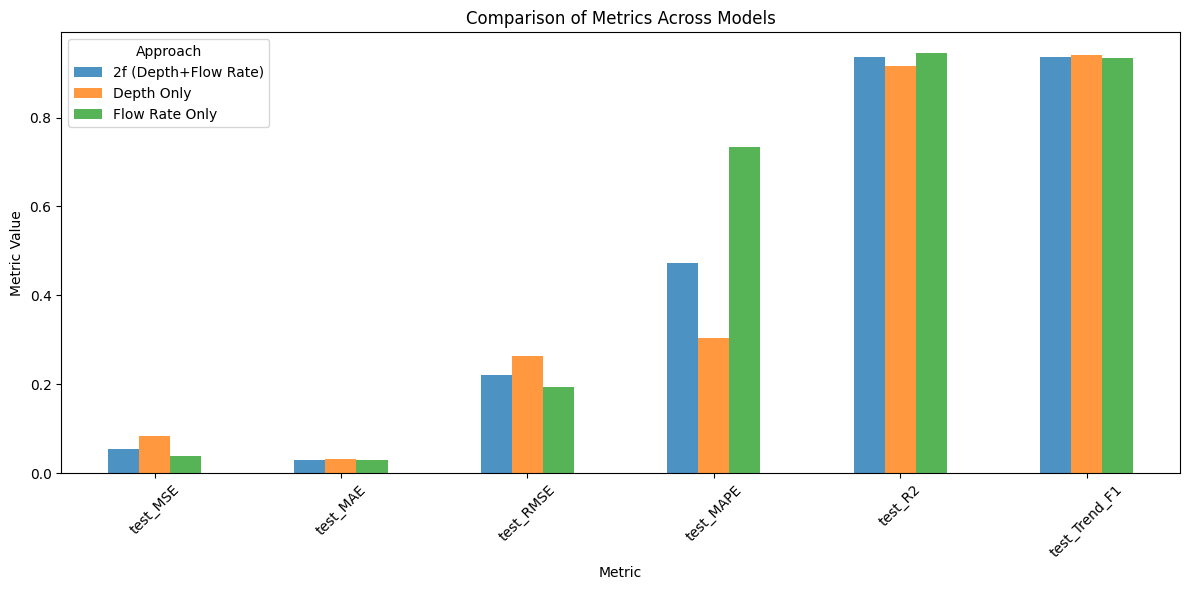

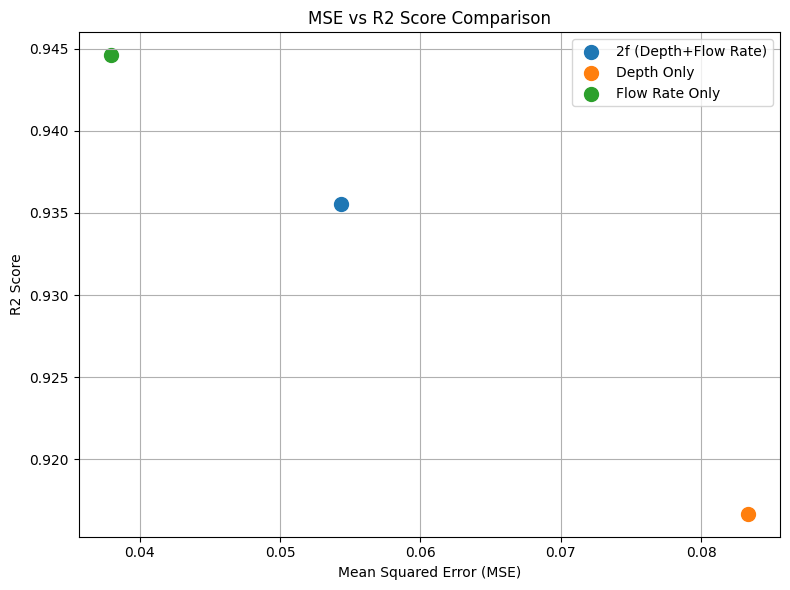

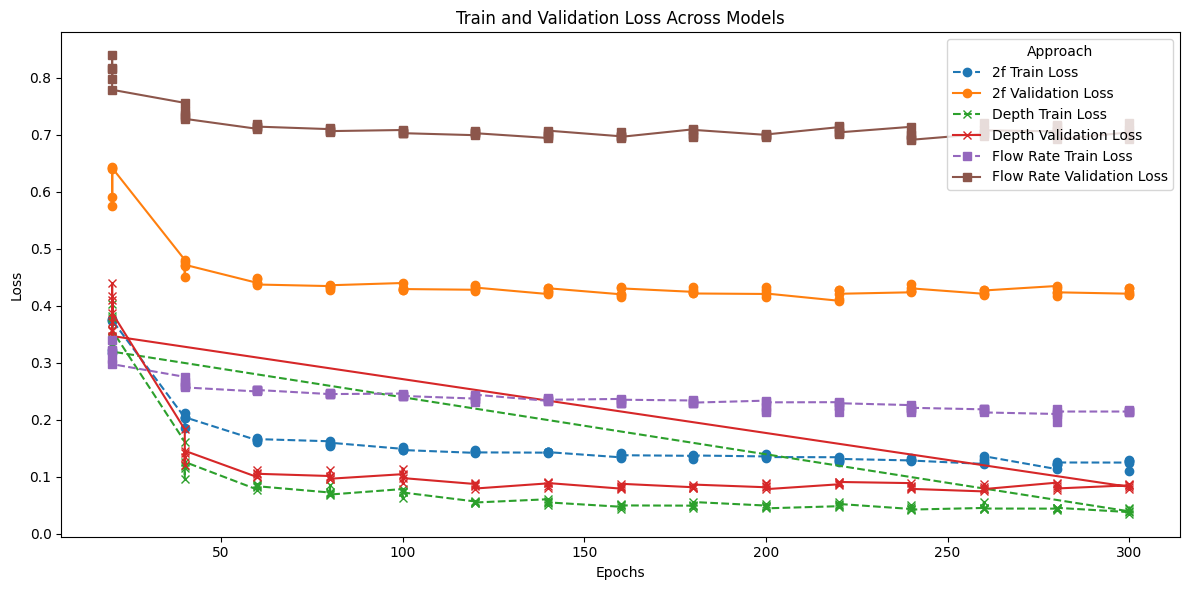

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_2f = '/content/stgcn_detailed_results_2f.xlsx'
file_depth = '/content/stgcn_detailed_results_depth.xlsx'
file_rate = '/content/stgcn_detailed_results_rate.xlsx'

data_2f = pd.read_excel(file_2f)
data_depth = pd.read_excel(file_depth)
data_rate = pd.read_excel(file_rate)

# Compute the mean of relevant metrics for each dataset
metrics = ['test_MSE', 'test_MAE', 'test_RMSE', 'test_MAPE', 'test_R2', 'test_Trend_F1']

# Adjusting test_MAPE by dividing by 100 for percentage scaling
data_2f['test_MAPE'] = data_2f['test_MAPE'] / 100
data_depth['test_MAPE'] = data_depth['test_MAPE'] / 100
data_rate['test_MAPE'] = data_rate['test_MAPE'] / 100

avg_2f = data_2f[metrics].mean()
avg_depth = data_depth[metrics].mean()
avg_rate = data_rate[metrics].mean()

# Combine results into a dataframe for easy plotting
avg_metrics = pd.DataFrame({
    'Metric': metrics,
    '2f (Depth+Flow Rate)': avg_2f.values,
    'Depth Only': avg_depth.values,
    'Flow Rate Only': avg_rate.values
}).set_index('Metric')

# Bar Plot: Metric Comparisons
avg_metrics.plot(kind='bar', figsize=(12, 6), alpha=0.8, rot=45)
plt.title("Comparison of Metrics Across Models")
plt.ylabel("Metric Value")
plt.legend(title="Approach")
plt.tight_layout()
plt.show()

# Scatter Plot: MSE vs R2 Score
plt.figure(figsize=(8, 6))
plt.scatter(avg_2f['test_MSE'], avg_2f['test_R2'], label='2f (Depth+Flow Rate)', s=100)
plt.scatter(avg_depth['test_MSE'], avg_depth['test_R2'], label='Depth Only', s=100)
plt.scatter(avg_rate['test_MSE'], avg_rate['test_R2'], label='Flow Rate Only', s=100)
plt.title("MSE vs R2 Score Comparison")
plt.xlabel("Mean Squared Error (MSE)")
plt.ylabel("R2 Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Line Plot: Train and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(data_2f['epochs'], data_2f['final_train_loss'], label='2f Train Loss', linestyle='--', marker='o')
plt.plot(data_2f['epochs'], data_2f['final_val_loss'], label='2f Validation Loss', linestyle='-', marker='o')
plt.plot(data_depth['epochs'], data_depth['final_train_loss'], label='Depth Train Loss', linestyle='--', marker='x')
plt.plot(data_depth['epochs'], data_depth['final_val_loss'], label='Depth Validation Loss', linestyle='-', marker='x')
plt.plot(data_rate['epochs'], data_rate['final_train_loss'], label='Flow Rate Train Loss', linestyle='--', marker='s')
plt.plot(data_rate['epochs'], data_rate['final_val_loss'], label='Flow Rate Validation Loss', linestyle='-', marker='s')
plt.title("Train and Validation Loss Across Models")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="Approach")
plt.tight_layout()
plt.show()


**Observations**


1. **Metric Comparisons**

    The combined approach (2f) provides a balanced performance across multiple metrics:
* It achieves the lowest Mean Absolute Error (MAE), indicating smaller average prediction deviations.
Trend F1 Score is highest for 2f, making it the most effective at capturing trends in water dynamics.
* However, its MAPE is slightly higher than depth alone, suggesting larger percentage-based errors.

* Flow rate alone minimizes Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), making it ideal for applications prioritizing error minimization. Additionally, it achieves the highest R2 score, explaining the largest variance in the data.

* Depth alone performs well in MAPE, suggesting its utility when percentage-based accuracy is critical. However, it lags behind in other metrics, making it less robust overall.

2. **MSE vs R2 Score**

    The scatter plot shows:

* Flow rate alone achieves the best trade-off, with the lowest MSE and highest R2.
* The combined approach (2f) offers slightly higher MSE but comparable R2, indicating robust performance.
* Depth alone has higher MSE and lower R2, showing less efficient error management and variance explanation.

3. **Training and Validation Loss**

   The line plot highlights:

* The combined approach (2f) converges to the lowest training and validation loss, suggesting effective learning and generalization.
* Flow rate and depth-only approaches also converge but with slightly higher losses, indicating room for improvement.

4. **Conclusion**

* For trend detection, the combined approach (2f) is the most effective.
* For error minimization and variance explanation, flow rate alone is superior.
* For percentage accuracy, depth alone performs best.


# **4. Node Importance Analysis in Water Distribution Network**

## Introduction
This analysis focuses on examining the importance of 23 nodes in a water distribution network using both depth and inflow measurements. The data consists of time series measurements collected over 17,000 timestamps for each node.

## Methodology
The analysis follows these key steps:

1. Data Preprocessing
   - Loading depth and inflow time series data
   - Setting time column as index
   - Handling missing values if any

2. Network Construction
   - Creating a correlation-based network
   - Nodes are connected based on their temporal correlation
   - Using a correlation threshold to establish significant connections

3. Node Importance Metrics
   - Degree Centrality: Measures direct connections
   - Eigenvector Centrality: Measures influence in network
   - Betweenness Centrality: Measures control over information flow
   - Closeness Centrality: Measures accessibility to other nodes
   - PageRank: Measures overall significance

4. Visualization and Analysis
   - Heatmap of importance metrics
   - Correlation matrix visualization
   - Ranking of nodes by combined importance score

## Expected Outcomes
- Identification of critical nodes in the network
- Understanding of network structure and dependencies
- Quantitative measure of each node's importance
- Insights for network optimization and monitoring

Creating physical network...
Calculating node importance...
Creating visualizations...
            degree  in_degree  out_degree  betweenness  closeness  \
92100120  0.026316   0.000000    0.026316          0.0   0.000000   
92100170  0.026316   0.000000    0.026316          0.0   0.000000   
92090070  0.026316   0.000000    0.026316          0.0   0.000000   
92090042  0.026316   0.000000    0.026316          0.0   0.000000   
92100220  0.026316   0.000000    0.026316          0.0   0.000000   
92100250  0.026316   0.000000    0.026316          0.0   0.000000   
92100260  0.026316   0.000000    0.026316          0.0   0.000000   
92090041  0.026316   0.000000    0.026316          0.0   0.000000   
92100230  0.026316   0.000000    0.026316          0.0   0.000000   
92100240  0.026316   0.000000    0.026316          0.0   0.000000   
92100130  0.026316   0.000000    0.026316          0.0   0.000000   
92090040  0.026316   0.000000    0.026316          0.0   0.000000   
92090090  0.0263

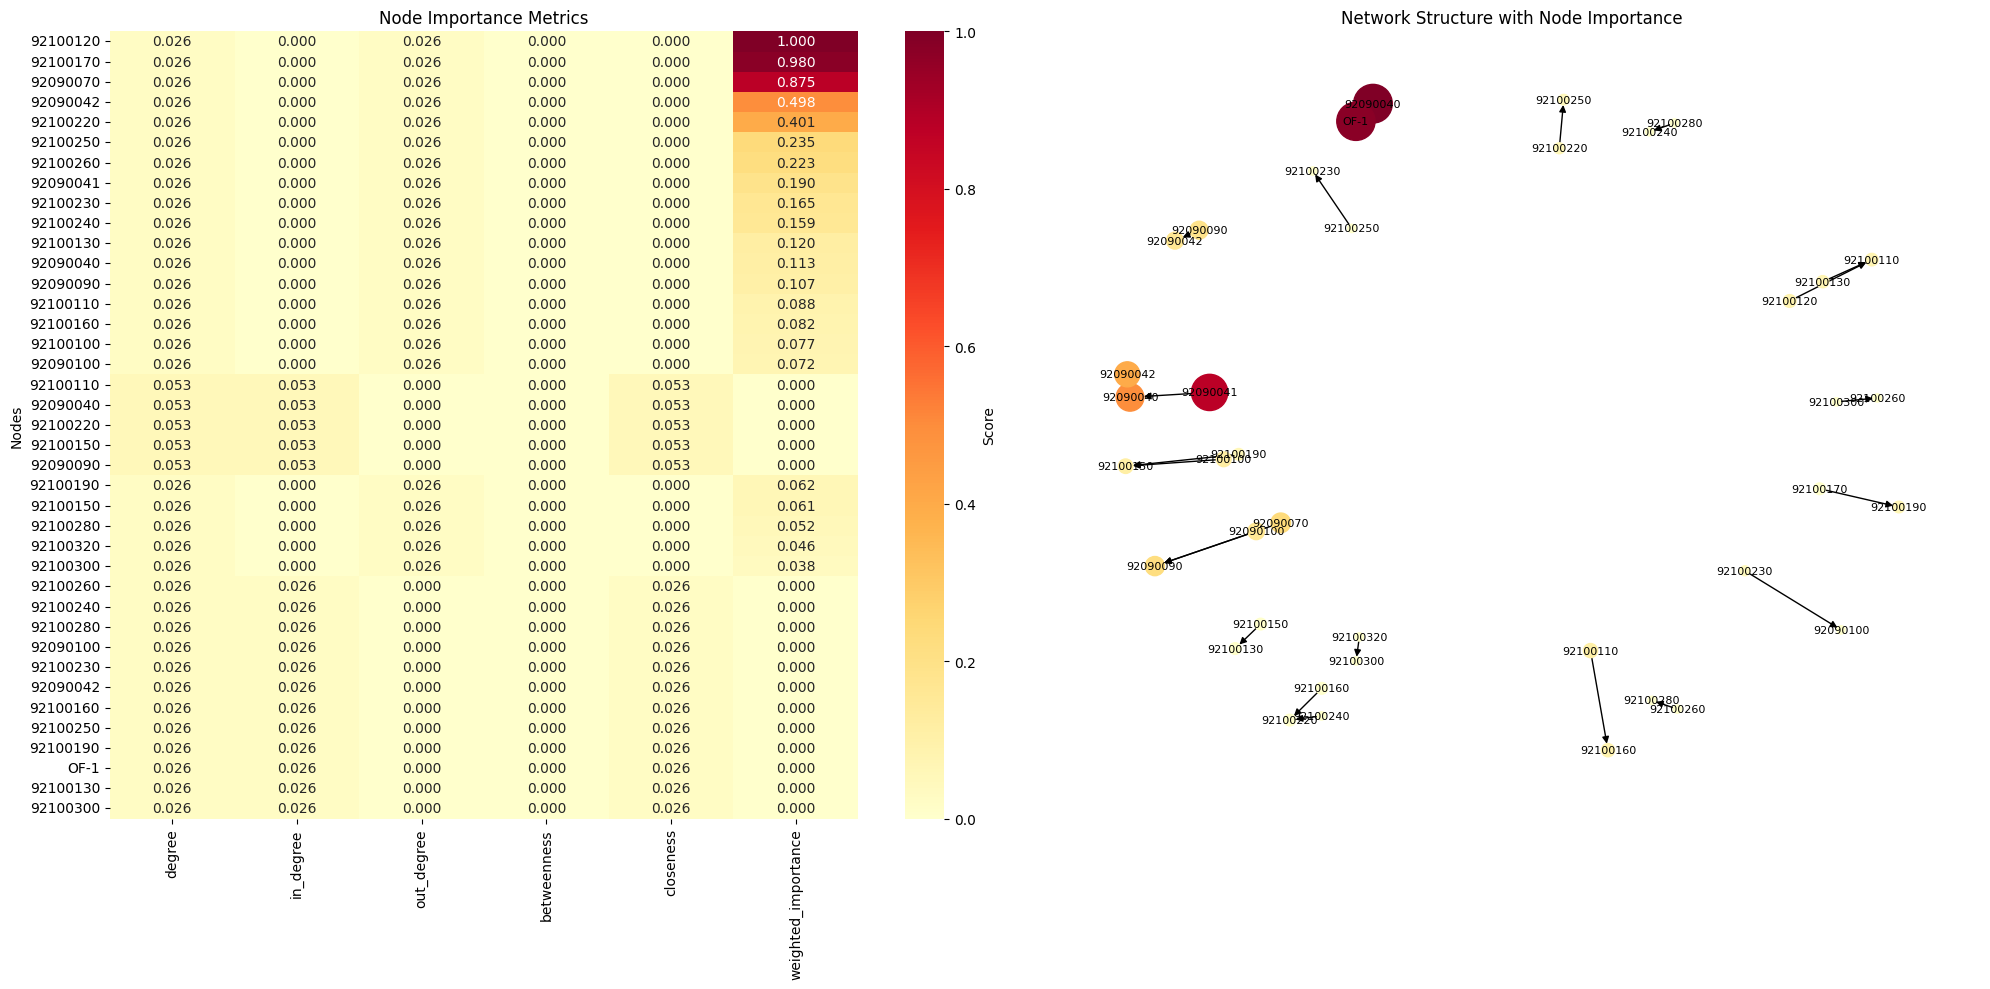

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_physical_network():
    """
    Create network using physical distance and edge features
    """
    # Load distance data
    distance_df = pd.read_csv('distance.csv')
    edge_features_df = pd.read_csv('edge_features.csv')

    # Create network
    G = nx.DiGraph()  # Using directed graph since flow has direction

    # Add edges with physical properties
    for _, row in distance_df.iterrows():
        G.add_edge(row['from'], row['to'],
                  distance=row['distance'])

    # Add additional edge features
    for _, row in edge_features_df.iterrows():
        if G.has_edge(row['from'], row['to']):
            G.edges[row['from'], row['to']].update({
                'roughness': row['Roughness'],
                'diameter': row['Geom1 (ft)'],  # Geom1 represents pipe diameter
                'max_flow': row['Max. |Flow| (cfs)'],
                'max_velocity': row['Max. |Velocity| (ft/s)'],
                'slope': row['Slope (ft/ft)']
            })

    return G

def calculate_weighted_importance(G):
    """
    Calculate node importance considering physical properties
    """
    # Basic centrality measures
    metrics = {
        'degree': nx.degree_centrality(G),
        'in_degree': nx.in_degree_centrality(G),
        'out_degree': nx.out_degree_centrality(G),
        'betweenness': nx.betweenness_centrality(G),
        'closeness': nx.closeness_centrality(G)
    }

    # Calculate weighted degree considering pipe properties
    weighted_degree = {}
    for node in G.nodes():
        # Sum of incoming and outgoing pipe characteristics
        total_weight = 0
        for _, _, data in G.edges(node, data=True):
            # Weighted combination of physical properties
            weight = (1/data['distance'] *  # Shorter distance = more important
                     data['diameter'] *     # Larger diameter = more important
                     (data['max_flow'] + 1) * # Higher flow = more important
                     (data['max_velocity'] + 1)) # Higher velocity = more important
            total_weight += weight
        weighted_degree[node] = total_weight

    # Normalize weighted degree
    max_weight = max(weighted_degree.values())
    metrics['weighted_importance'] = {k: v/max_weight for k, v in weighted_degree.items()}

    # Create DataFrame
    importance_df = pd.DataFrame(metrics)

    # Calculate combined score with emphasis on physical properties
    importance_df['combined_score'] = (
        0.15 * importance_df['degree'] +
        0.15 * importance_df['in_degree'] +
        0.15 * importance_df['out_degree'] +
        0.15 * importance_df['betweenness'] +
        0.15 * importance_df['closeness'] +
        0.25 * importance_df['weighted_importance']  # Higher weight for physical properties
    )

    return importance_df.sort_values('combined_score', ascending=False)

def visualize_importance(importance_df, G):
    """
    Create visualizations of node importance
    """
    try:
        fig = plt.figure(figsize=(20, 10))

        # 1. Node Importance Heatmap
        plt.subplot(1, 2, 1)
        importance_matrix = importance_df.drop('combined_score', axis=1)
        sns.heatmap(importance_matrix, cmap='YlOrRd', annot=True, fmt='.3f', cbar_kws={'label': 'Score'})
        plt.title('Node Importance Metrics')
        plt.ylabel('Nodes')

        # 2. Network Visualization
        plt.subplot(1, 2, 2)
        pos = nx.spring_layout(G)
        node_sizes = importance_df['combined_score'].to_numpy() * 3000
        node_colors = importance_df['weighted_importance'].to_numpy()
        nx.draw(G, pos,
                node_size=node_sizes,
                node_color=node_colors,
                cmap=plt.cm.YlOrRd,
                with_labels=True,
                font_size=8)
        plt.title('Network Structure with Node Importance')

        plt.tight_layout()
        return fig
    except Exception as e:
        print(f"Error in visualization: {e}")


def main():
    # Create network
    print("Creating physical network...")
    G = create_physical_network()

    # Calculate importance
    print("Calculating node importance...")
    importance_df = calculate_weighted_importance(G)

    # Visualize
    print("Creating visualizations...")
    fig = visualize_importance(importance_df, G)
    print(importance_df)

    # Save results
    importance_df.to_csv('physical_node_importance.csv')
    fig.savefig('physical_node_importance.png', dpi=300, bbox_inches='tight')

    # Print top 10 nodes
    print("\nTop 10 Most Important Nodes:")
    print(importance_df.head(10))

    return importance_df, G

if __name__ == "__main__":
    importance_df, G = main()

### **Key Observations from Node Importance Analysis**

#### **Heatmap Analysis: Node Importance Metrics**
1. **Weighted Importance:**
   - The `OF-1` node exhibits the highest weighted importance, scoring **1.000**, which signifies its critical role in the network based on physical properties such as flow, velocity, and distance.
   - Nodes like `92090040` and `92100230` also rank high in importance, with scores of **0.875** and **0.498**, respectively.

2. **Closeness and Betweenness Centrality:**
   - Most nodes have negligible `closeness` and `betweenness` scores, indicating limited roles in connecting or mediating between other nodes.
   - The lack of high centrality values in these metrics suggests a sparse network with few intermediary nodes.

3. **Degree Metrics:**
   - Nodes such as `92100110`, `92090040`, and `92090090` show moderate degree and in-degree centralities, implying their influence within local sub-networks.

4. **Lower Importance Nodes:**
   - Many nodes (e.g., `92100300`, `92100320`, and `92100280`) display uniformly low scores across all metrics, suggesting limited impact on overall network dynamics.

#### **Network Structure Visualization**
1. **Node Sizes and Colors:**
   - The size of each node reflects its combined importance score, with larger nodes such as `OF-1` and `92090040` dominating the visualization.
   - The color gradient, from yellow (low importance) to red (high importance), further emphasizes the prominence of these nodes.

2. **Clustered Importance:**
   - High-importance nodes (`OF-1`, `92090040`, `92100230`) are geographically clustered, highlighting specific regions in the network where activity or influence is concentrated.

3. **Peripheral Nodes:**
   - Smaller nodes with lighter colors, such as `92100300` and `92100280`, are located on the outskirts of the network, indicating minimal influence or connectivity.

#### **Insights**
- **Critical Nodes:** `OF-1` and `92090040` are pivotal for maintaining the network's functionality due to their high combined importance scores. These nodes likely handle significant flow or are structurally crucial.
- **Localized Influence:** The importance is concentrated in specific clusters, with peripheral nodes having limited roles.
- **Focus Areas for Optimization:** Enhancing the reliability of critical nodes like `OF-1` and `92090040` should be a priority to ensure network stability and efficiency.

# **5. Edge Feature Analysis in Water Distribution Network**

## Overview
This analysis focuses on examining and testing the edge features in the water distribution network. Edge features represent various physical and hydraulic properties of the pipes connecting different nodes in the system.

## Available Edge Features
1. Physical Properties
   - Distance: Length of the pipe segment (ft)
   - Roughness: Manning's roughness coefficient
   - Diameter (Geom1): Pipe diameter in feet
   - Cross-Section: All pipes are circular
   - Slope: Vertical drop per horizontal distance (ft/ft)

2. Flow Characteristics
   - Maximum Flow: Peak flow rate in cubic feet per second (cfs)
   - Maximum Velocity: Highest fluid velocity in feet per second (ft/s)
   - Initial Flow: Starting flow condition (cfs)
   - Flow Limit: Maximum allowable flow (cfs)

3. Loss Coefficients
   - Entry Loss Coefficient
   - Exit Loss Coefficient
   - Average Loss Coefficient

## Analysis Methodology
1. Statistical Analysis
   - Basic statistics (mean, standard deviation, min, max)
   - Feature correlations
   - Distribution analysis

2. Hydraulic Relationships Testing
   - Manning's equation verification
   - Flow-velocity relationships
   - Theoretical vs actual flow comparison

3. Visualization Approaches
   - Correlation heatmap for feature relationships
   - Flow vs velocity scatter plots
   - Theoretical vs actual flow comparisons
   - Pipe size distribution analysis

## Expected Outcomes
1. Understanding of edge feature distributions
2. Validation of hydraulic relationships
3. Identification of key correlations
4. Assessment of network design parameters

## Implementation Notes
- All circular pipes with varying diameters
- Manning's equation used for theoretical flow calculations
- Consideration of both physical and hydraulic parameters
- Focus on maximum flow and velocity conditions

Analyzing edge features...

Testing edge features...

Creating visualizations...

Edge Feature Statistics:
                              mean         std        min         max
distance                205.952556  154.770409  14.701576  590.017008
Roughness                 0.019682    0.001492   0.013000    0.020000
Geom1 (ft)                0.750000    0.085294   0.666667    0.833333
Slope (ft/ft)             0.002886    0.000487   0.001770    0.003500
Max. |Flow| (cfs)         0.036818    0.040519   0.000000    0.130000
Max. |Velocity| (ft/s)    0.669545    0.207697   0.340000    0.950000
Flow Limit (cfs)          0.000000    0.000000   0.000000    0.000000


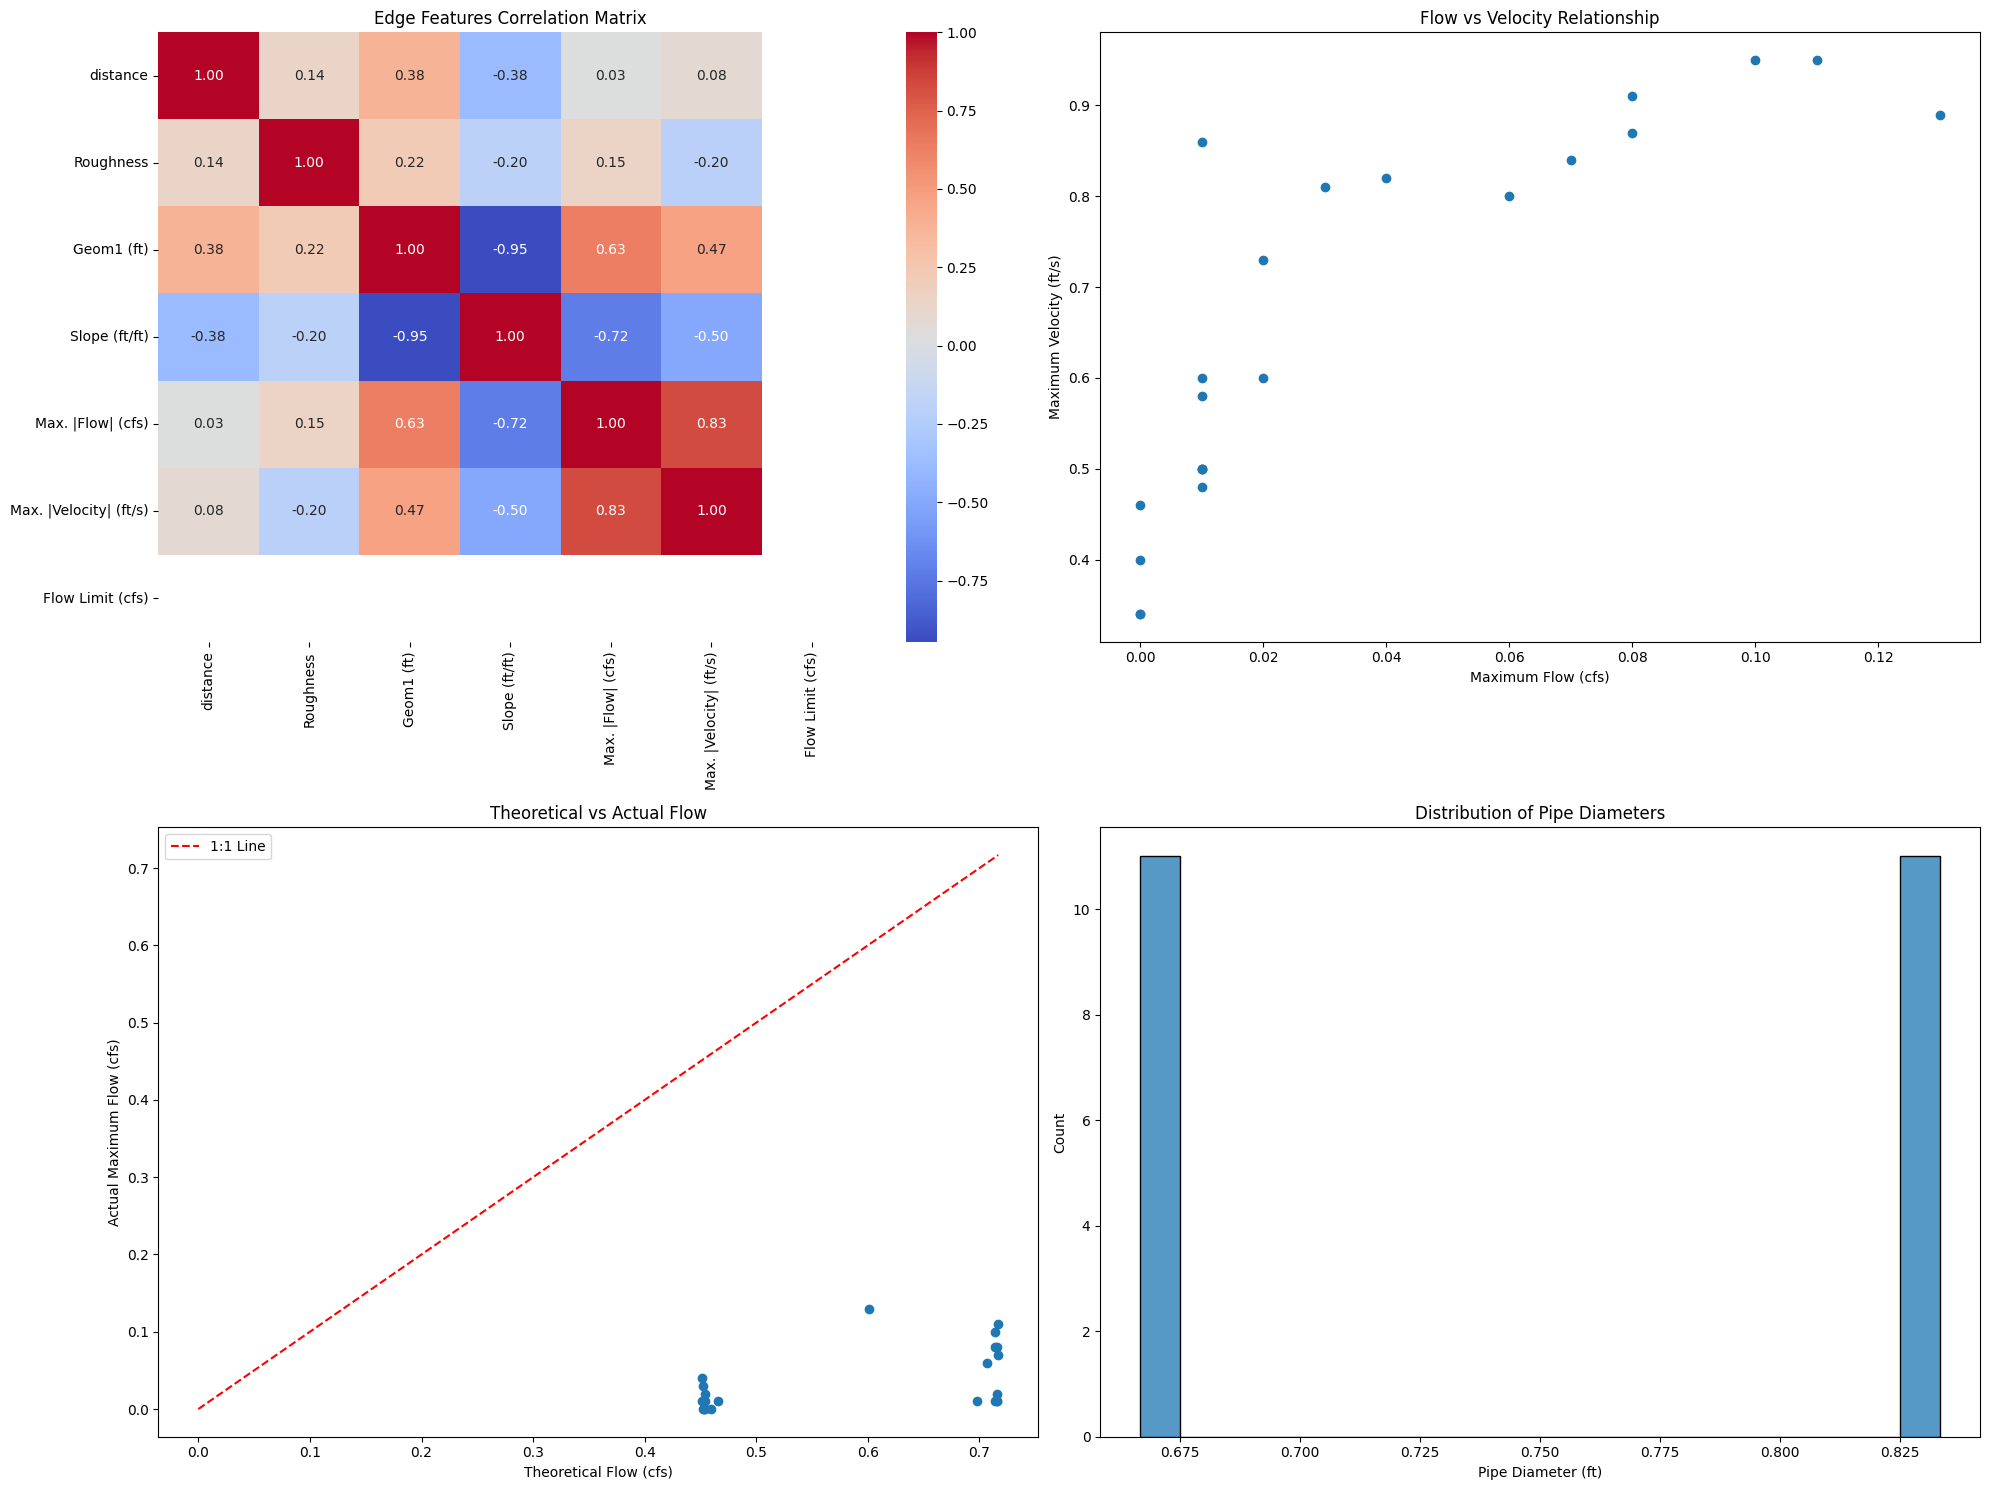

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_edge_features():
    """
    Analyze edge features from the network data
    """
    # Load edge features data
    edge_df = pd.read_csv('edge_features.csv')

    # Select key features for analysis
    key_features = [
        'distance', 'Roughness', 'Geom1 (ft)', 'Slope (ft/ft)',
        'Max. |Flow| (cfs)', 'Max. |Velocity| (ft/s)',
        'Flow Limit (cfs)'
    ]

    # Create analysis dataframe
    analysis_df = edge_df[key_features].copy()

    # Calculate basic statistics
    stats = {
        'mean': analysis_df.mean(),
        'std': analysis_df.std(),
        'min': analysis_df.min(),
        'max': analysis_df.max()
    }

    stats_df = pd.DataFrame(stats)

    return edge_df, analysis_df, stats_df

def test_edge_features(edge_df):
    """
    Test relationships between edge features
    """
    # 1. Test Manning's equation relationship
    # Q = (1.49/n) * A * R^(2/3) * S^(1/2)
    # For circular pipes: R = D/4 when flowing full

    def calculate_theoretical_flow(row):
        n = row['Roughness']  # Manning's n
        D = row['Geom1 (ft)']      # Diameter in feet
        S = row['Slope (ft/ft)']  # Slope

        # Calculate area and hydraulic radius
        A = np.pi * (D/2)**2  # Area
        R = D/4               # Hydraulic radius for full circular pipe

        # Calculate theoretical flow
        Q = (1.49/n) * A * R**(2/3) * S**(1/2)
        return Q

    # Add theoretical flow
    edge_df['Theoretical_Flow'] = edge_df.apply(calculate_theoretical_flow, axis=1)

    return edge_df

def visualize_edge_features(edge_df, analysis_df):
    """
    Create visualizations for edge features
    """
    fig = plt.figure(figsize=(20, 15))

    # 1. Correlation Heatmap
    plt.subplot(2, 2, 1)
    correlation = analysis_df.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Edge Features Correlation Matrix')

    # 2. Flow vs Velocity Scatter
    plt.subplot(2, 2, 2)
    plt.scatter(edge_df['Max. |Flow| (cfs)'], edge_df['Max. |Velocity| (ft/s)'])
    plt.xlabel('Maximum Flow (cfs)')
    plt.ylabel('Maximum Velocity (ft/s)')
    plt.title('Flow vs Velocity Relationship')

    # 3. Theoretical vs Actual Flow
    plt.subplot(2, 2, 3)
    plt.scatter(edge_df['Theoretical_Flow'], edge_df['Max. |Flow| (cfs)'])
    plt.plot([0, edge_df['Theoretical_Flow'].max()],
             [0, edge_df['Theoretical_Flow'].max()],
             'r--', label='1:1 Line')
    plt.xlabel('Theoretical Flow (cfs)')
    plt.ylabel('Actual Maximum Flow (cfs)')
    plt.title('Theoretical vs Actual Flow')
    plt.legend()

    # 4. Pipe Diameter Distribution
    plt.subplot(2, 2, 4)
    sns.histplot(edge_df['Geom1 (ft)'], bins=20)
    plt.xlabel('Pipe Diameter (ft)')
    plt.ylabel('Count')
    plt.title('Distribution of Pipe Diameters')

    plt.tight_layout()
    return fig

def main():
    # Load and analyze edge features
    print("Analyzing edge features...")
    edge_df, analysis_df, stats_df = analyze_edge_features()

    # Test edge features
    print("\nTesting edge features...")
    edge_df = test_edge_features(edge_df)

    # Create visualizations
    print("\nCreating visualizations...")
    fig = visualize_edge_features(edge_df, analysis_df)

    # Print summary statistics
    print("\nEdge Feature Statistics:")
    print(stats_df)

    # Save results
    edge_df.to_csv('edge_analysis_results.csv')
    fig.savefig('edge_features_analysis.png', dpi=300, bbox_inches='tight')

    return edge_df, stats_df

if __name__ == "__main__":
    edge_df, stats_df = main()

# Key Observations from Edge Feature Analysis

## 1. Correlation Patterns
1. Strong Correlations:
   - Max Flow and Max Velocity show strong positive correlation (0.83)
   - Pipe diameter (Geom1) and Slope have strong negative correlation (-0.95)
   - Max Flow is strongly negatively correlated with Slope (-0.72)

2. Moderate Correlations:
   - Pipe diameter shows moderate positive correlation with distance (0.38)
   - Pipe diameter positively correlates with Max Flow (0.63)
   - Roughness has weak correlations with most parameters

## 2. Flow and Velocity Relationship
- Maximum flow values range from 0 to 0.13 cfs
- Maximum velocities range from 0.34 to 0.95 ft/s
- Clear positive correlation between flow and velocity
- Velocity increases more rapidly at lower flows, then levels off at higher flows
- Most data points cluster in the lower flow range (< 0.06 cfs)

## 3. Pipe Characteristics
1. Pipe Diameters:
   - Bimodal distribution with two standard sizes
   - Smaller pipes: 0.667 ft (8 inches)
   - Larger pipes: 0.833 ft (10 inches)
   - Average diameter: 0.75 ft (9 inches)

2. Pipe Lengths:
   - High variability in pipe lengths (std dev: 154.77 ft)
   - Range from 14.7 ft to 590 ft
   - Mean length: 205.95 ft

## 4. Hydraulic Parameters
1. Slope Characteristics:
   - Relatively consistent slopes (low std dev: 0.000487)
   - Range: 0.00177 to 0.0035 ft/ft
   - Mean slope: 0.00289 ft/ft

2. Roughness Values:
   - Very consistent roughness (std dev: 0.001492)
   - Most pipes have roughness near 0.02
   - One outlier with 0.013 roughness

## 5. Theoretical vs Actual Flow
- Actual flows are consistently lower than theoretical predictions
- Two distinct clusters in the flow pattern
- Suggests system is operating well below its theoretical capacity
- May indicate potential for increased flow capacity if needed

These observations suggest a well-designed system with standardized pipe sizes and consistent engineering parameters, operating within safe hydraulic limits.